# Binary Classification of Breast Cancer into Benign and Malignant
## Followed by Visualization

In [1]:
## Loading and observing data

wbcd_df <- read.csv("../input/breast-cancer-wisconsin-data/data.csv")
head(wbcd_df)
dim(wbcd_df)

id       diagnosis radius_mean texture_mean perimeter_mean area_mean
1   842302 M         17.99       10.38        122.80         1001.0   
2   842517 M         20.57       17.77        132.90         1326.0   
3 84300903 M         19.69       21.25        130.00         1203.0   
4 84348301 M         11.42       20.38         77.58          386.1   
5 84358402 M         20.29       14.34        135.10         1297.0   
6   843786 M         12.45       15.70         82.57          477.1   
  smoothness_mean compactness_mean concavity_mean concave.points_mean ⋯
1 0.11840         0.27760          0.3001         0.14710             ⋯
2 0.08474         0.07864          0.0869         0.07017             ⋯
3 0.10960         0.15990          0.1974         0.12790             ⋯
4 0.14250         0.28390          0.2414         0.10520             ⋯
5 0.10030         0.13280          0.1980         0.10430             ⋯
6 0.12780         0.17000          0.1578         0.08089             ⋯
  texture_worst perimeter_worst area_worst smoothness_worst compactness_worst
1 17.33         184.60          2019.0     0.1622           0.6656           
2 23.41         158.80          1956.0     0.1238           0.1866           
3 25.53         152.50          1709.0     0.1444           0.4245           
4 26.50          98.87           567.7     0.2098           0.8663           
5 16.67         152.20          1575.0     0.1374           0.2050           
6 23.75         103.40           741.6     0.1791           0.5249           
  concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst
1 0.7119          0.2654               0.4601         0.11890                
2 0.2416          0.1860               0.2750         0.08902                
3 0.4504          0.2430               0.3613         0.08758                
4 0.6869          0.2575               0.6638         0.17300                
5 0.4000          0.1625               0.2364         0.07678                
6 0.5355          0.1741               0.3985         0.12440                
  X 
1 NA
2 NA
3 NA
4 NA
5 NA
6 NA

[1] 569  33

**Taking care of columns with null/missing values**

In [2]:
## Function to print the columns with null values

CheckColAllNulls <- if (ncol(Filter(function(x) any(is.na(x)), wbcd_df)) > 0) {
    cat("columns have nulls:",ncol(Filter( function(x) any(is.na(x)), wbcd_df)))
    cat("\n\n")
    cat("columns names that have nulls:",colnames(Filter( function(x) any(is.na(x)), wbcd_df)))
    cat("\n\n")
#     df <- Filter(function(x) ! any(is.na(x)), df)
#      print("columns having any nulls are removed")
} else {
    print("No columns having any nulls are found")
}

columns have nulls: 1

columns names that have nulls: X



In [3]:
## Thus no non-null value present -- we can safely drop this column

table(wbcd_df$X)

< table of extent 0 >

In [4]:
## Removing the column X

wbcd_df <- Filter(function(x) ! any(is.na(x)), wbcd_df)
dim(wbcd_df)

[1] 569  32

**Encoding categorical label variable**

In [5]:
## if diagnosis column is M meaning Malignant then 1 else 0 for B or Benign

wbcd_df$diagnosis <- (ifelse(wbcd_df$diagnosis=='B', 0, 1))
table(wbcd_df$diagnosis)


  0   1 
357 212 

In [6]:
wbcd_df$Label_Diagnosis <- factor(ifelse(wbcd_df$diagnosis==1, 1, 0))

**Summary of the cleaned data**

In [7]:
#summary(wbcd_df)

In [8]:
str(wbcd_df)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.7

In [9]:
head(wbcd_df)

id       diagnosis radius_mean texture_mean perimeter_mean area_mean
1   842302 1         17.99       10.38        122.80         1001.0   
2   842517 1         20.57       17.77        132.90         1326.0   
3 84300903 1         19.69       21.25        130.00         1203.0   
4 84348301 1         11.42       20.38         77.58          386.1   
5 84358402 1         20.29       14.34        135.10         1297.0   
6   843786 1         12.45       15.70         82.57          477.1   
  smoothness_mean compactness_mean concavity_mean concave.points_mean ⋯
1 0.11840         0.27760          0.3001         0.14710             ⋯
2 0.08474         0.07864          0.0869         0.07017             ⋯
3 0.10960         0.15990          0.1974         0.12790             ⋯
4 0.14250         0.28390          0.2414         0.10520             ⋯
5 0.10030         0.13280          0.1980         0.10430             ⋯
6 0.12780         0.17000          0.1578         0.08089             ⋯
  texture_worst perimeter_worst area_worst smoothness_worst compactness_worst
1 17.33         184.60          2019.0     0.1622           0.6656           
2 23.41         158.80          1956.0     0.1238           0.1866           
3 25.53         152.50          1709.0     0.1444           0.4245           
4 26.50          98.87           567.7     0.2098           0.8663           
5 16.67         152.20          1575.0     0.1374           0.2050           
6 23.75         103.40           741.6     0.1791           0.5249           
  concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst
1 0.7119          0.2654               0.4601         0.11890                
2 0.2416          0.1860               0.2750         0.08902                
3 0.4504          0.2430               0.3613         0.08758                
4 0.6869          0.2575               0.6638         0.17300                
5 0.4000          0.1625               0.2364         0.07678                
6 0.5355          0.1741               0.3985         0.12440                
  Label_Diagnosis
1 1              
2 1              
3 1              
4 1              
5 1              
6 1

## Correlation between Variables

In [10]:
library("Hmisc")

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}


corr_res <- rcorr(as.matrix(wbcd_df[,c(2:11)]))
flattenCorrMatrix(corr_res$r, corr_res$P)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




row                 column              cor         p           
1  diagnosis           radius_mean          0.73002851 0.000000e+00
2  diagnosis           texture_mean         0.41518530 0.000000e+00
3  radius_mean         texture_mean         0.32378189 2.220446e-15
4  diagnosis           perimeter_mean       0.74263553 0.000000e+00
5  radius_mean         perimeter_mean       0.99785528 0.000000e+00
6  texture_mean        perimeter_mean       0.32953306 6.661338e-16
7  diagnosis           area_mean            0.70898384 0.000000e+00
8  radius_mean         area_mean            0.98735717 0.000000e+00
9  texture_mean        area_mean            0.32108570 3.996803e-15
10 perimeter_mean      area_mean            0.98650680 0.000000e+00
11 diagnosis           smoothness_mean      0.35855997 0.000000e+00
12 radius_mean         smoothness_mean      0.17058119 4.312577e-05
13 texture_mean        smoothness_mean     -0.02338852 5.776966e-01
14 perimeter_mean      smoothness_mean      0.20727816 6.108608e-07
15 area_mean           smoothness_mean      0.17702838 2.165664e-05
16 diagnosis           compactness_mean     0.59653368 0.000000e+00
17 radius_mean         compactness_mean     0.50612358 0.000000e+00
18 texture_mean        compactness_mean     0.23670222 1.095581e-08
19 perimeter_mean      compactness_mean     0.55693621 0.000000e+00
20 area_mean           compactness_mean     0.49850168 0.000000e+00
21 smoothness_mean     compactness_mean     0.65912322 0.000000e+00
22 diagnosis           concavity_mean       0.69635971 0.000000e+00
23 radius_mean         concavity_mean       0.67676355 0.000000e+00
24 texture_mean        concavity_mean       0.30241783 1.691980e-13
25 perimeter_mean      concavity_mean       0.71613565 0.000000e+00
26 area_mean           concavity_mean       0.68598283 0.000000e+00
27 smoothness_mean     concavity_mean       0.52198377 0.000000e+00
28 compactness_mean    concavity_mean       0.88312067 0.000000e+00
29 diagnosis           concave.points_mean  0.77661384 0.000000e+00
30 radius_mean         concave.points_mean  0.82252852 0.000000e+00
31 texture_mean        concave.points_mean  0.29346405 9.152679e-13
32 perimeter_mean      concave.points_mean  0.85097704 0.000000e+00
33 area_mean           concave.points_mean  0.82326887 0.000000e+00
34 smoothness_mean     concave.points_mean  0.55369517 0.000000e+00
35 compactness_mean    concave.points_mean  0.83113504 0.000000e+00
36 concavity_mean      concave.points_mean  0.92139103 0.000000e+00
37 diagnosis           symmetry_mean        0.33049855 4.440892e-16
38 radius_mean         symmetry_mean        0.14774124 4.064650e-04
39 texture_mean        symmetry_mean        0.07140098 8.882926e-02
40 perimeter_mean      symmetry_mean        0.18302721 1.115686e-05
41 area_mean           symmetry_mean        0.15129308 2.925202e-04
42 smoothness_mean     symmetry_mean        0.55777479 0.000000e+00
43 compactness_mean    symmetry_mean        0.60264105 0.000000e+00
44 concavity_mean      symmetry_mean        0.50066662 0.000000e+00
45 concave.points_mean symmetry_mean        0.46249739 0.000000e+00

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




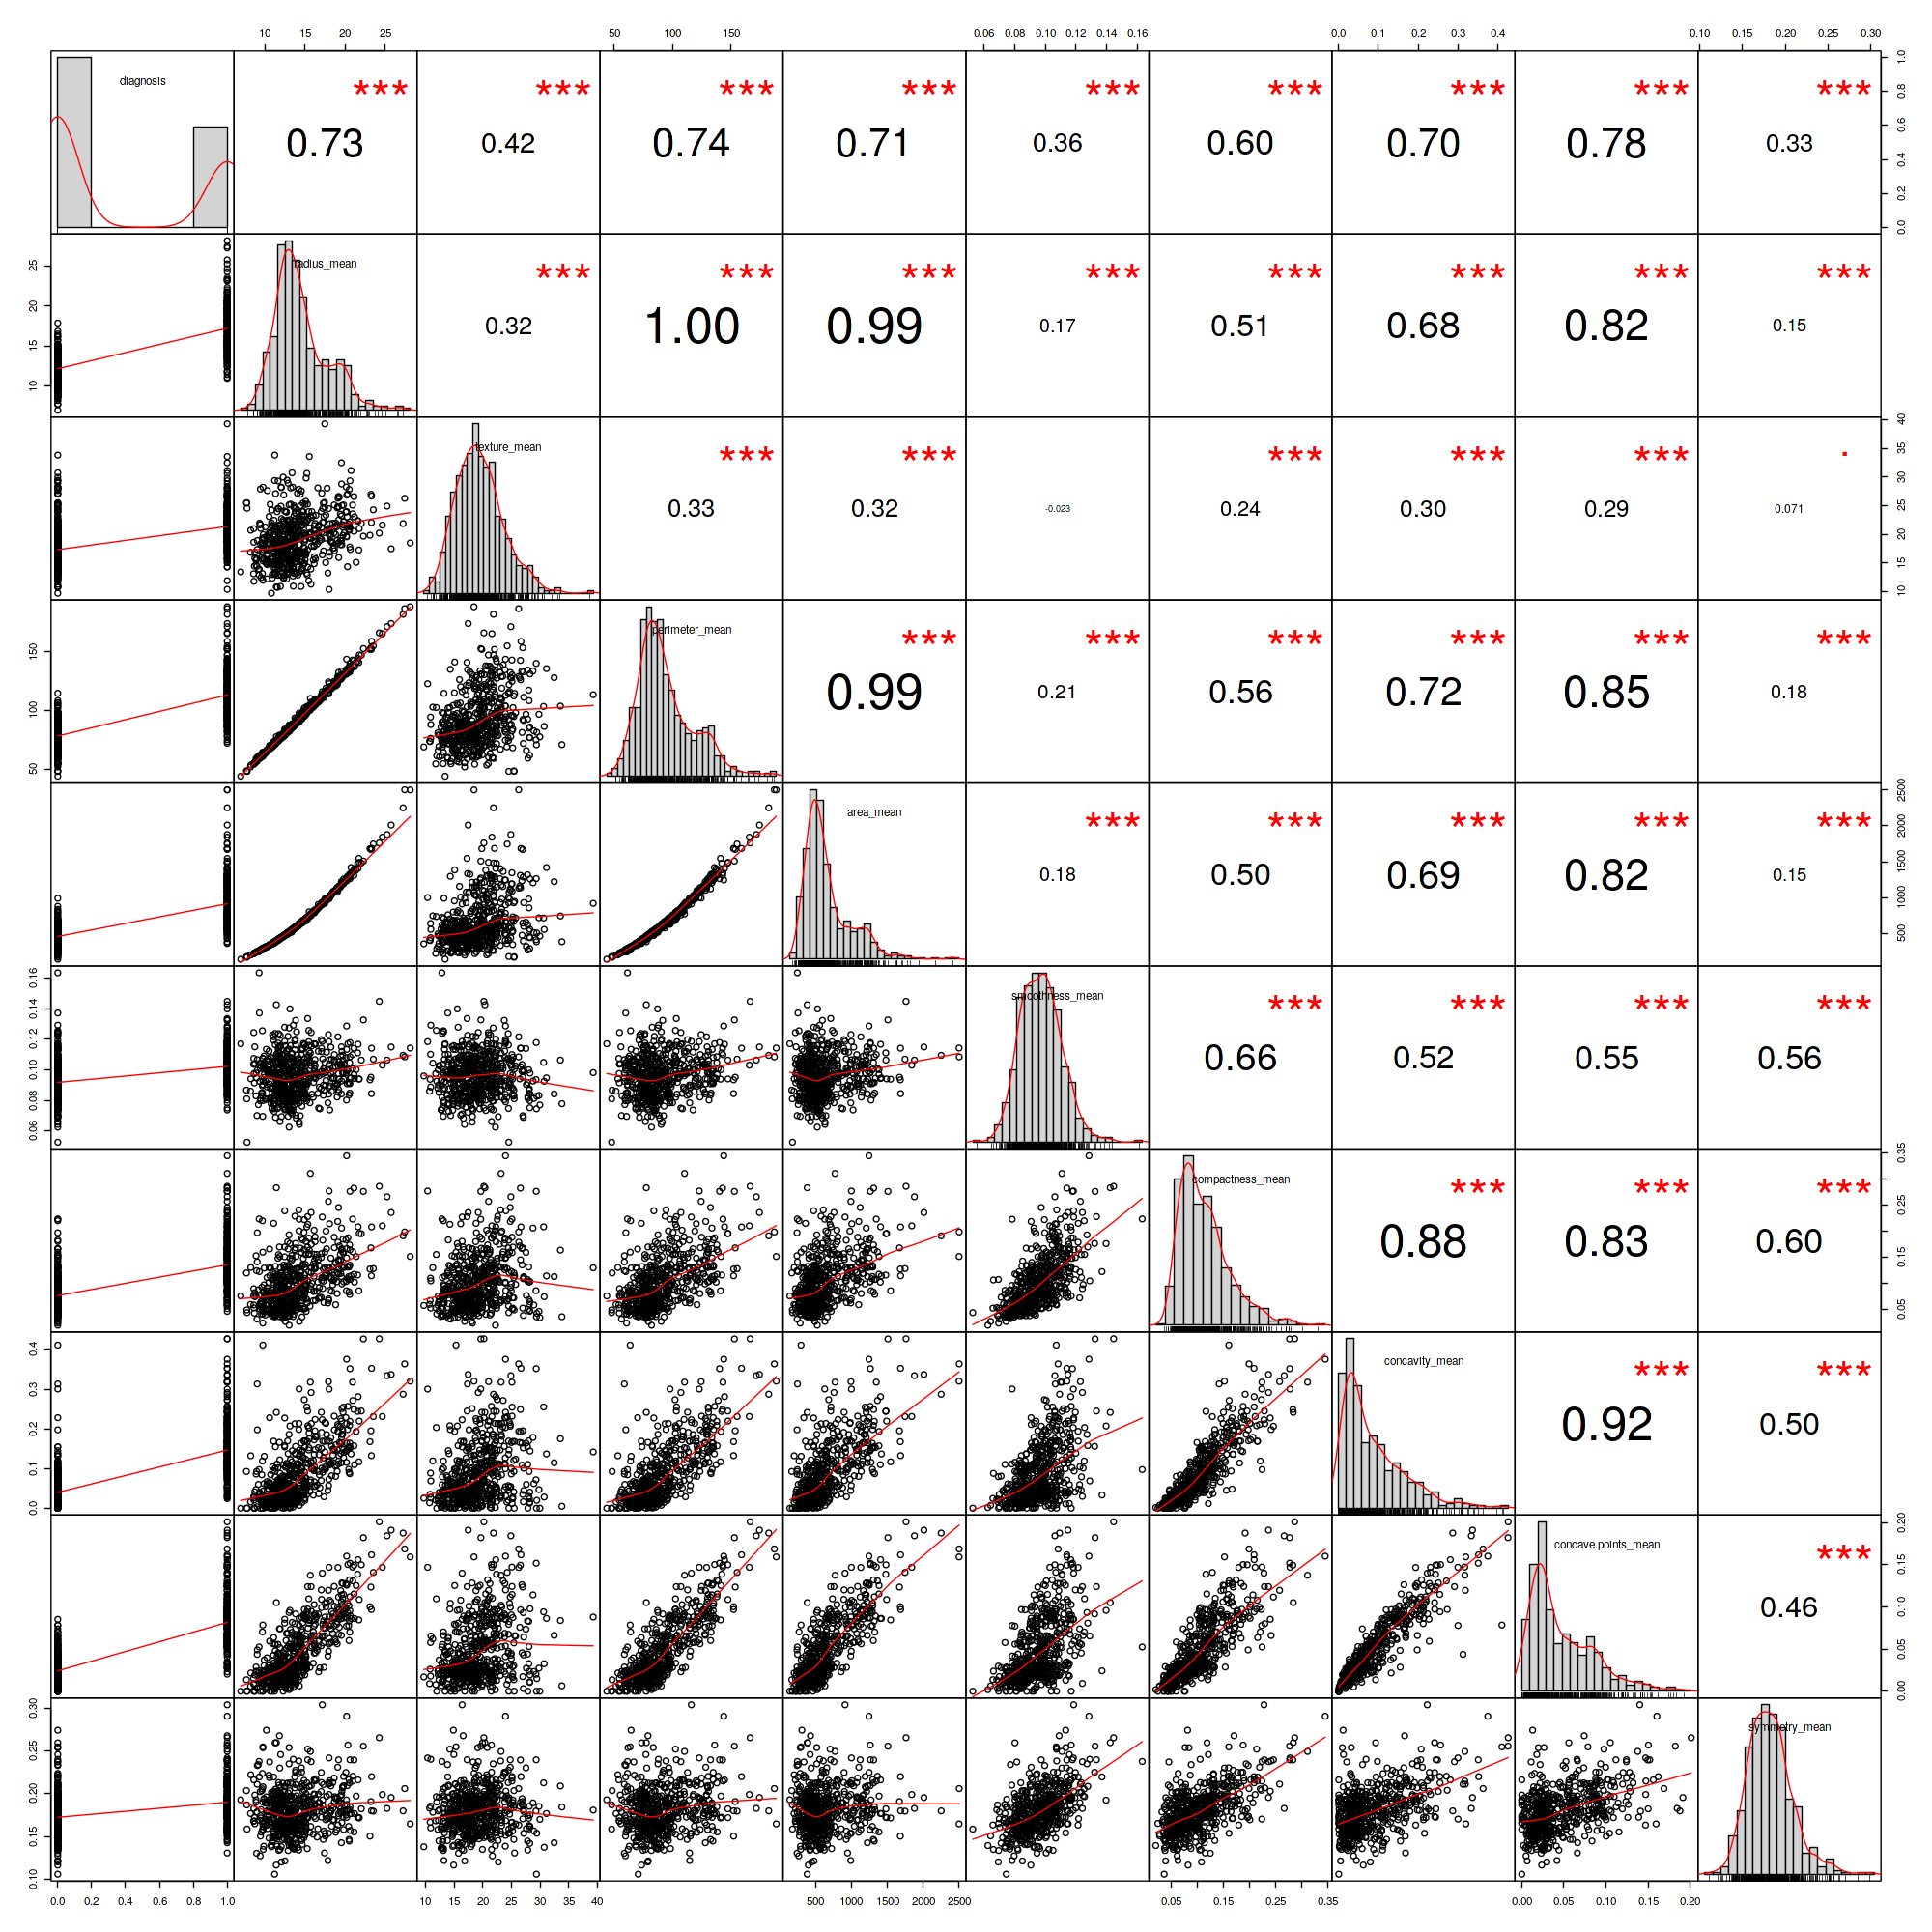

In [11]:
library(PerformanceAnalytics)
# showing histogram
# color grey
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)
chart.Correlation(wbcd_df[,c(2:11)],histogram=TRUE, 
                  col="grey10", 
                  pch=1, 
                  cex.cor.scale=2, 
                  main="Cancer Correlation Plot", 
                  cex.labels=20)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



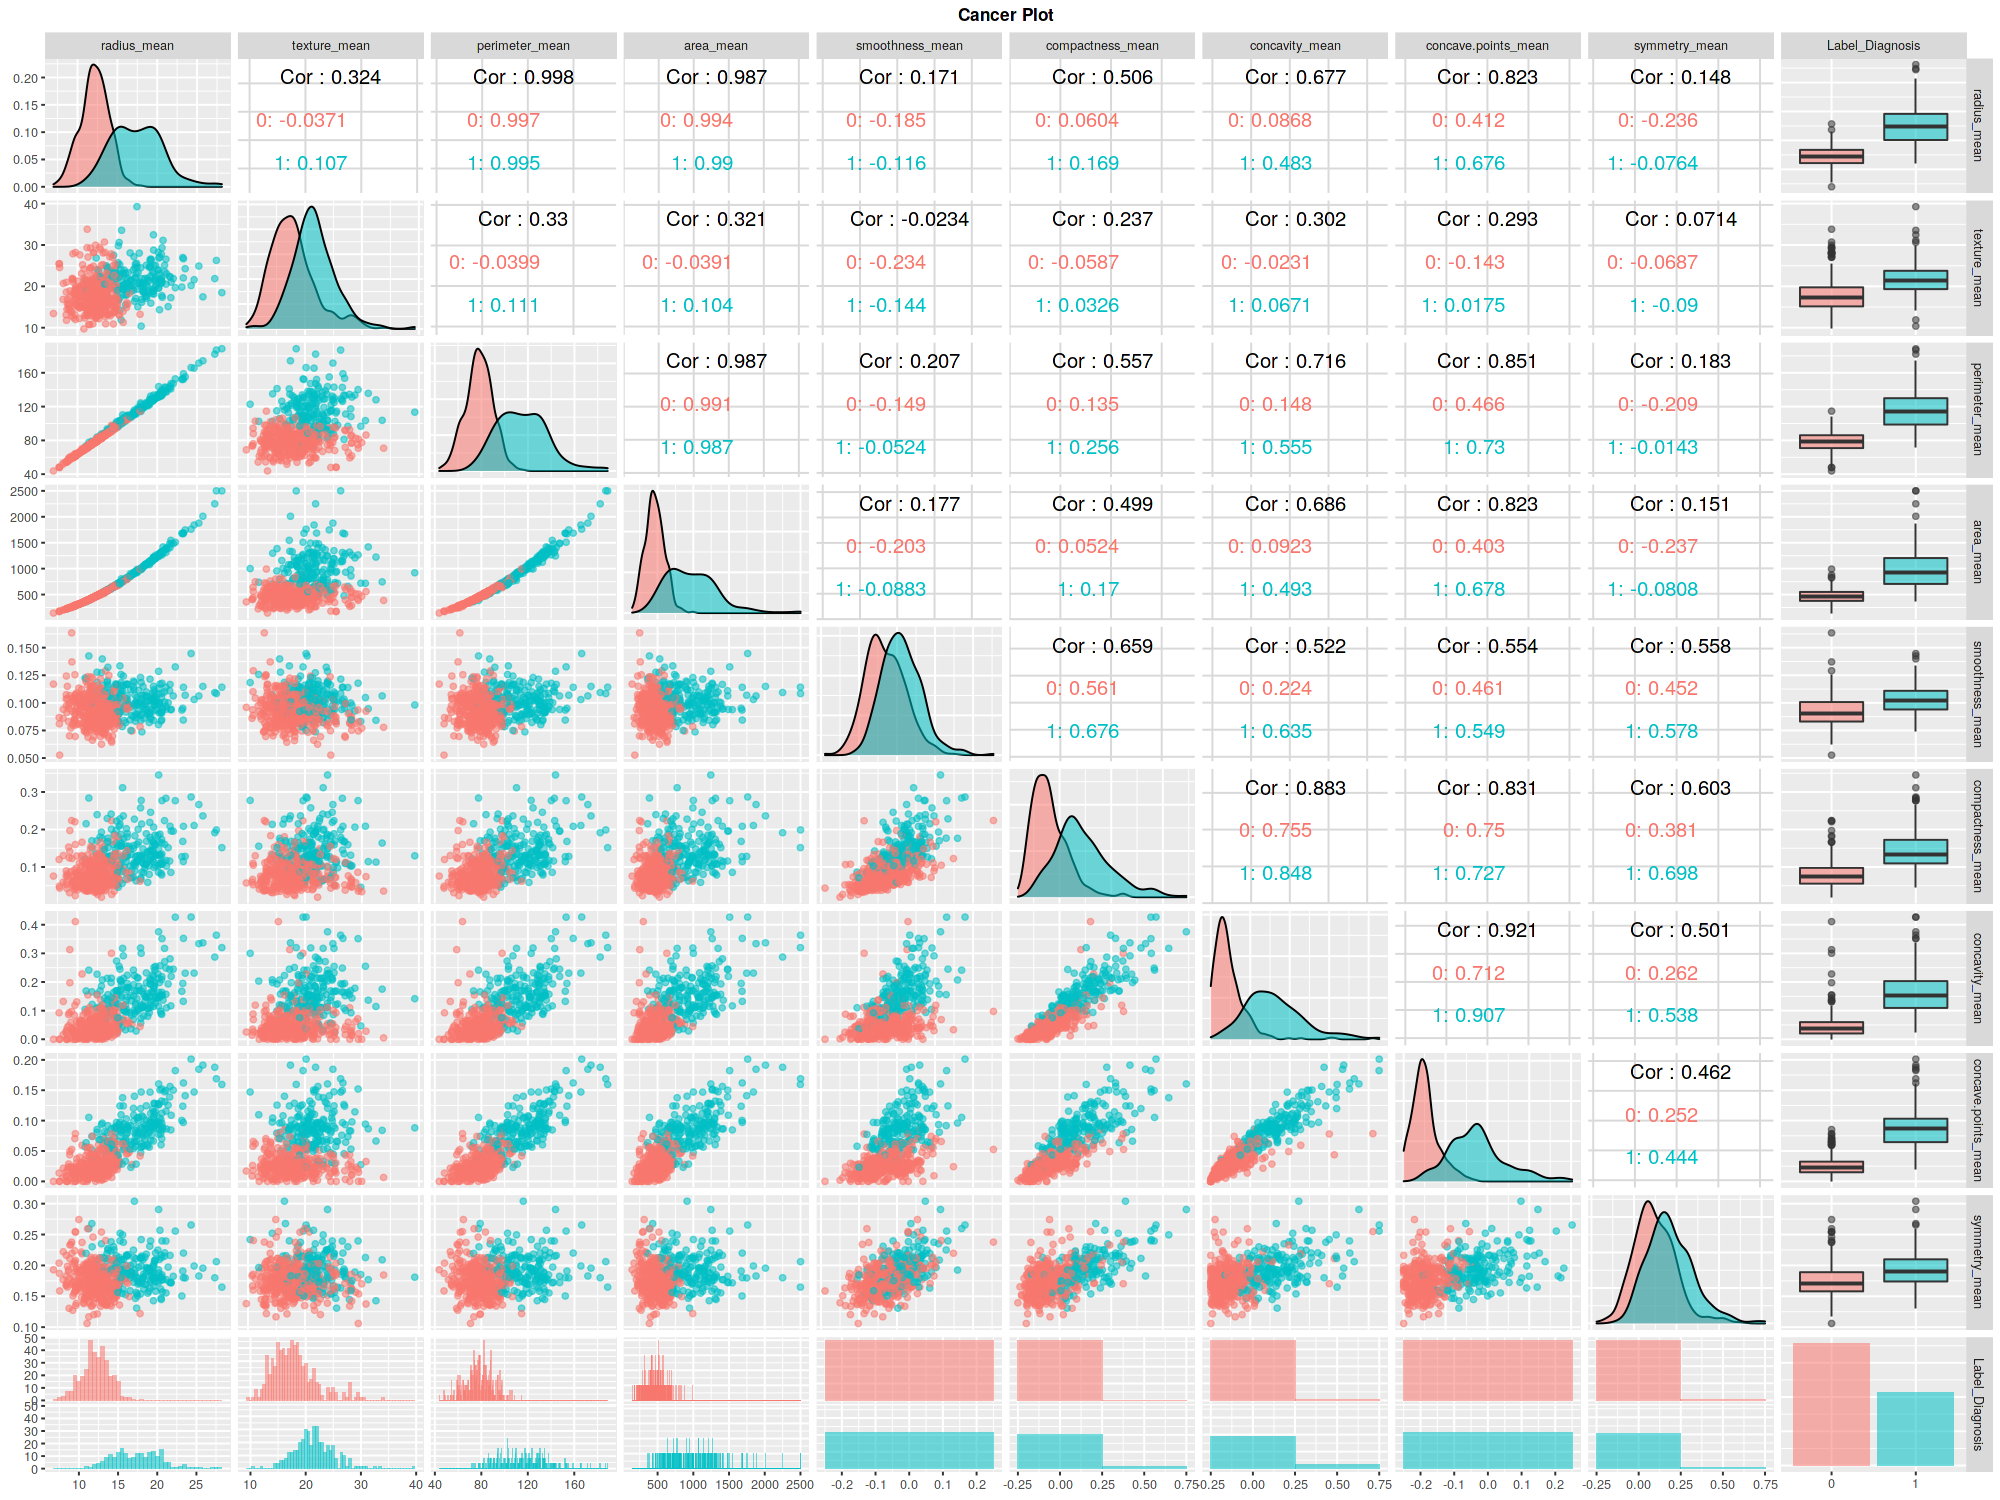

In [12]:
library(ggplot2)
library(GGally)
options(repr.plot.width = 20, repr.plot.height = 15, repr.plot.res = 100)

# The correlation plots should have 2 distributions of seperate colors according to out Label Diagnosis
# alpha is basically the opacity
ggpairs(wbcd_df[,c(3:11, 33)], 
        aes(color=Label_Diagnosis, alpha=0.7), 
        lower=list(combo=wrap("facethist",  binwidth=0.5)), 
        upper = list(continuous = wrap("cor", size=5))) + 
labs(title="Cancer Plot")+
theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

corrplot 0.84 loaded



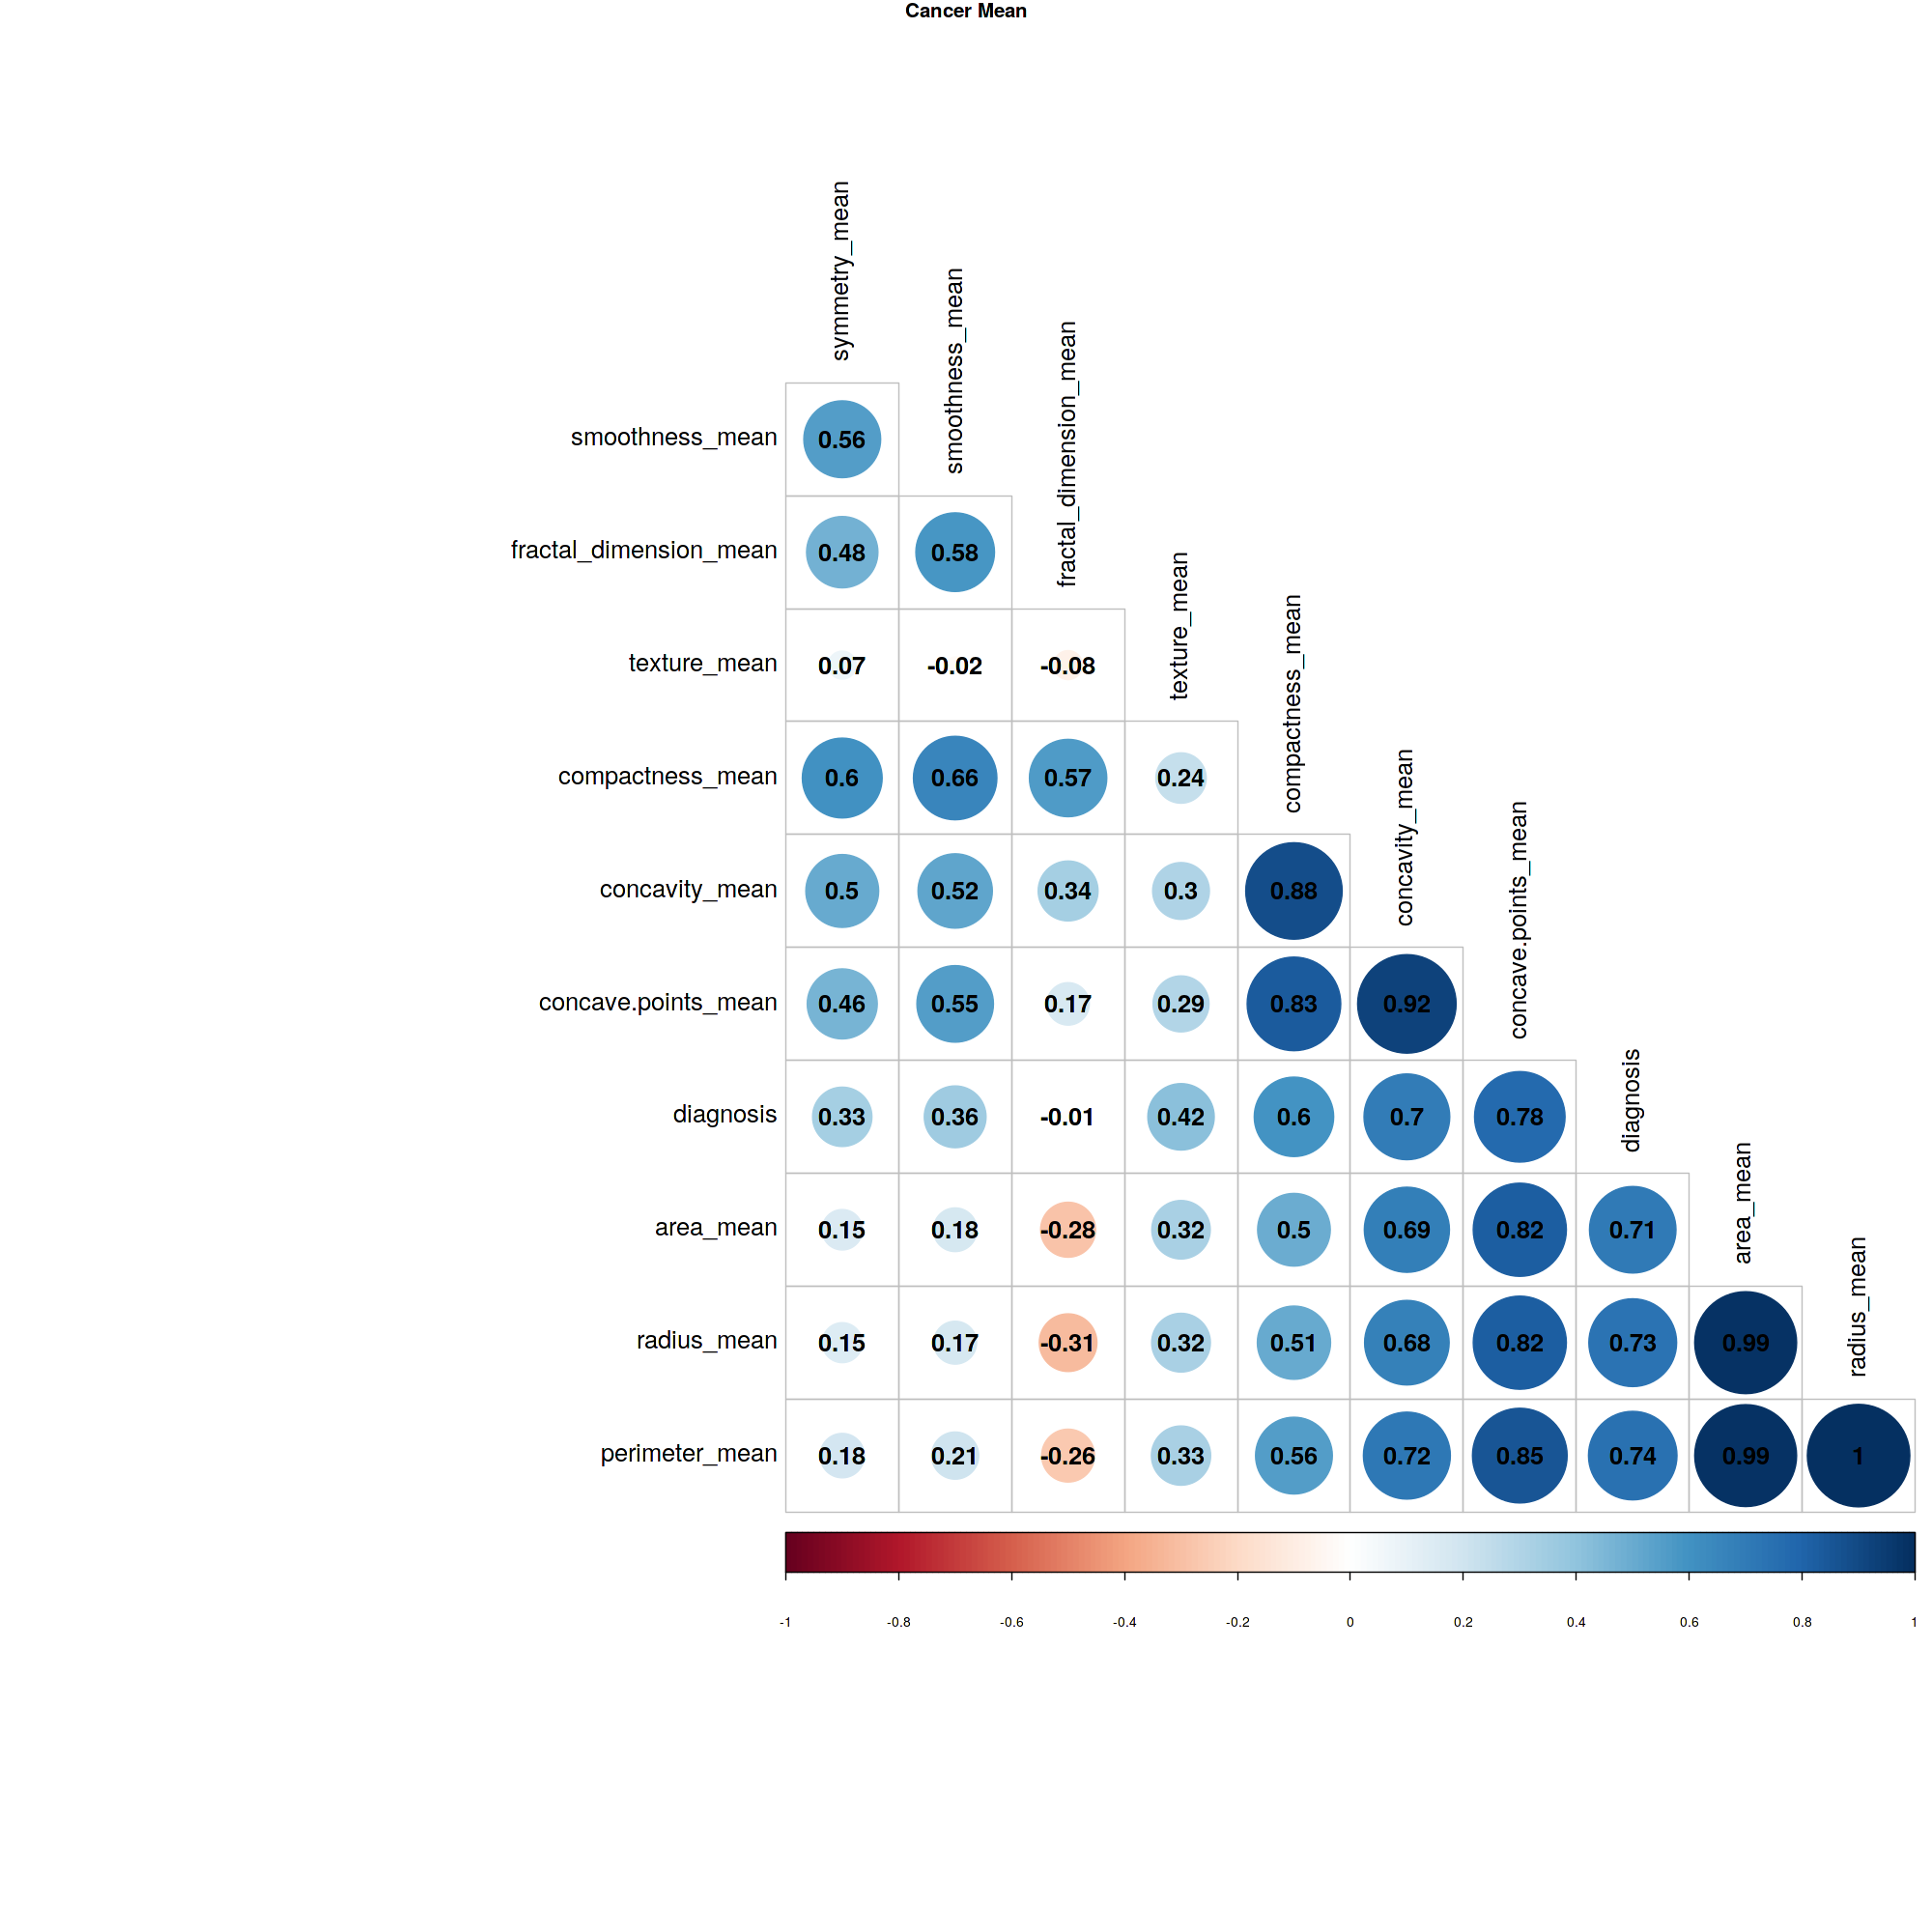

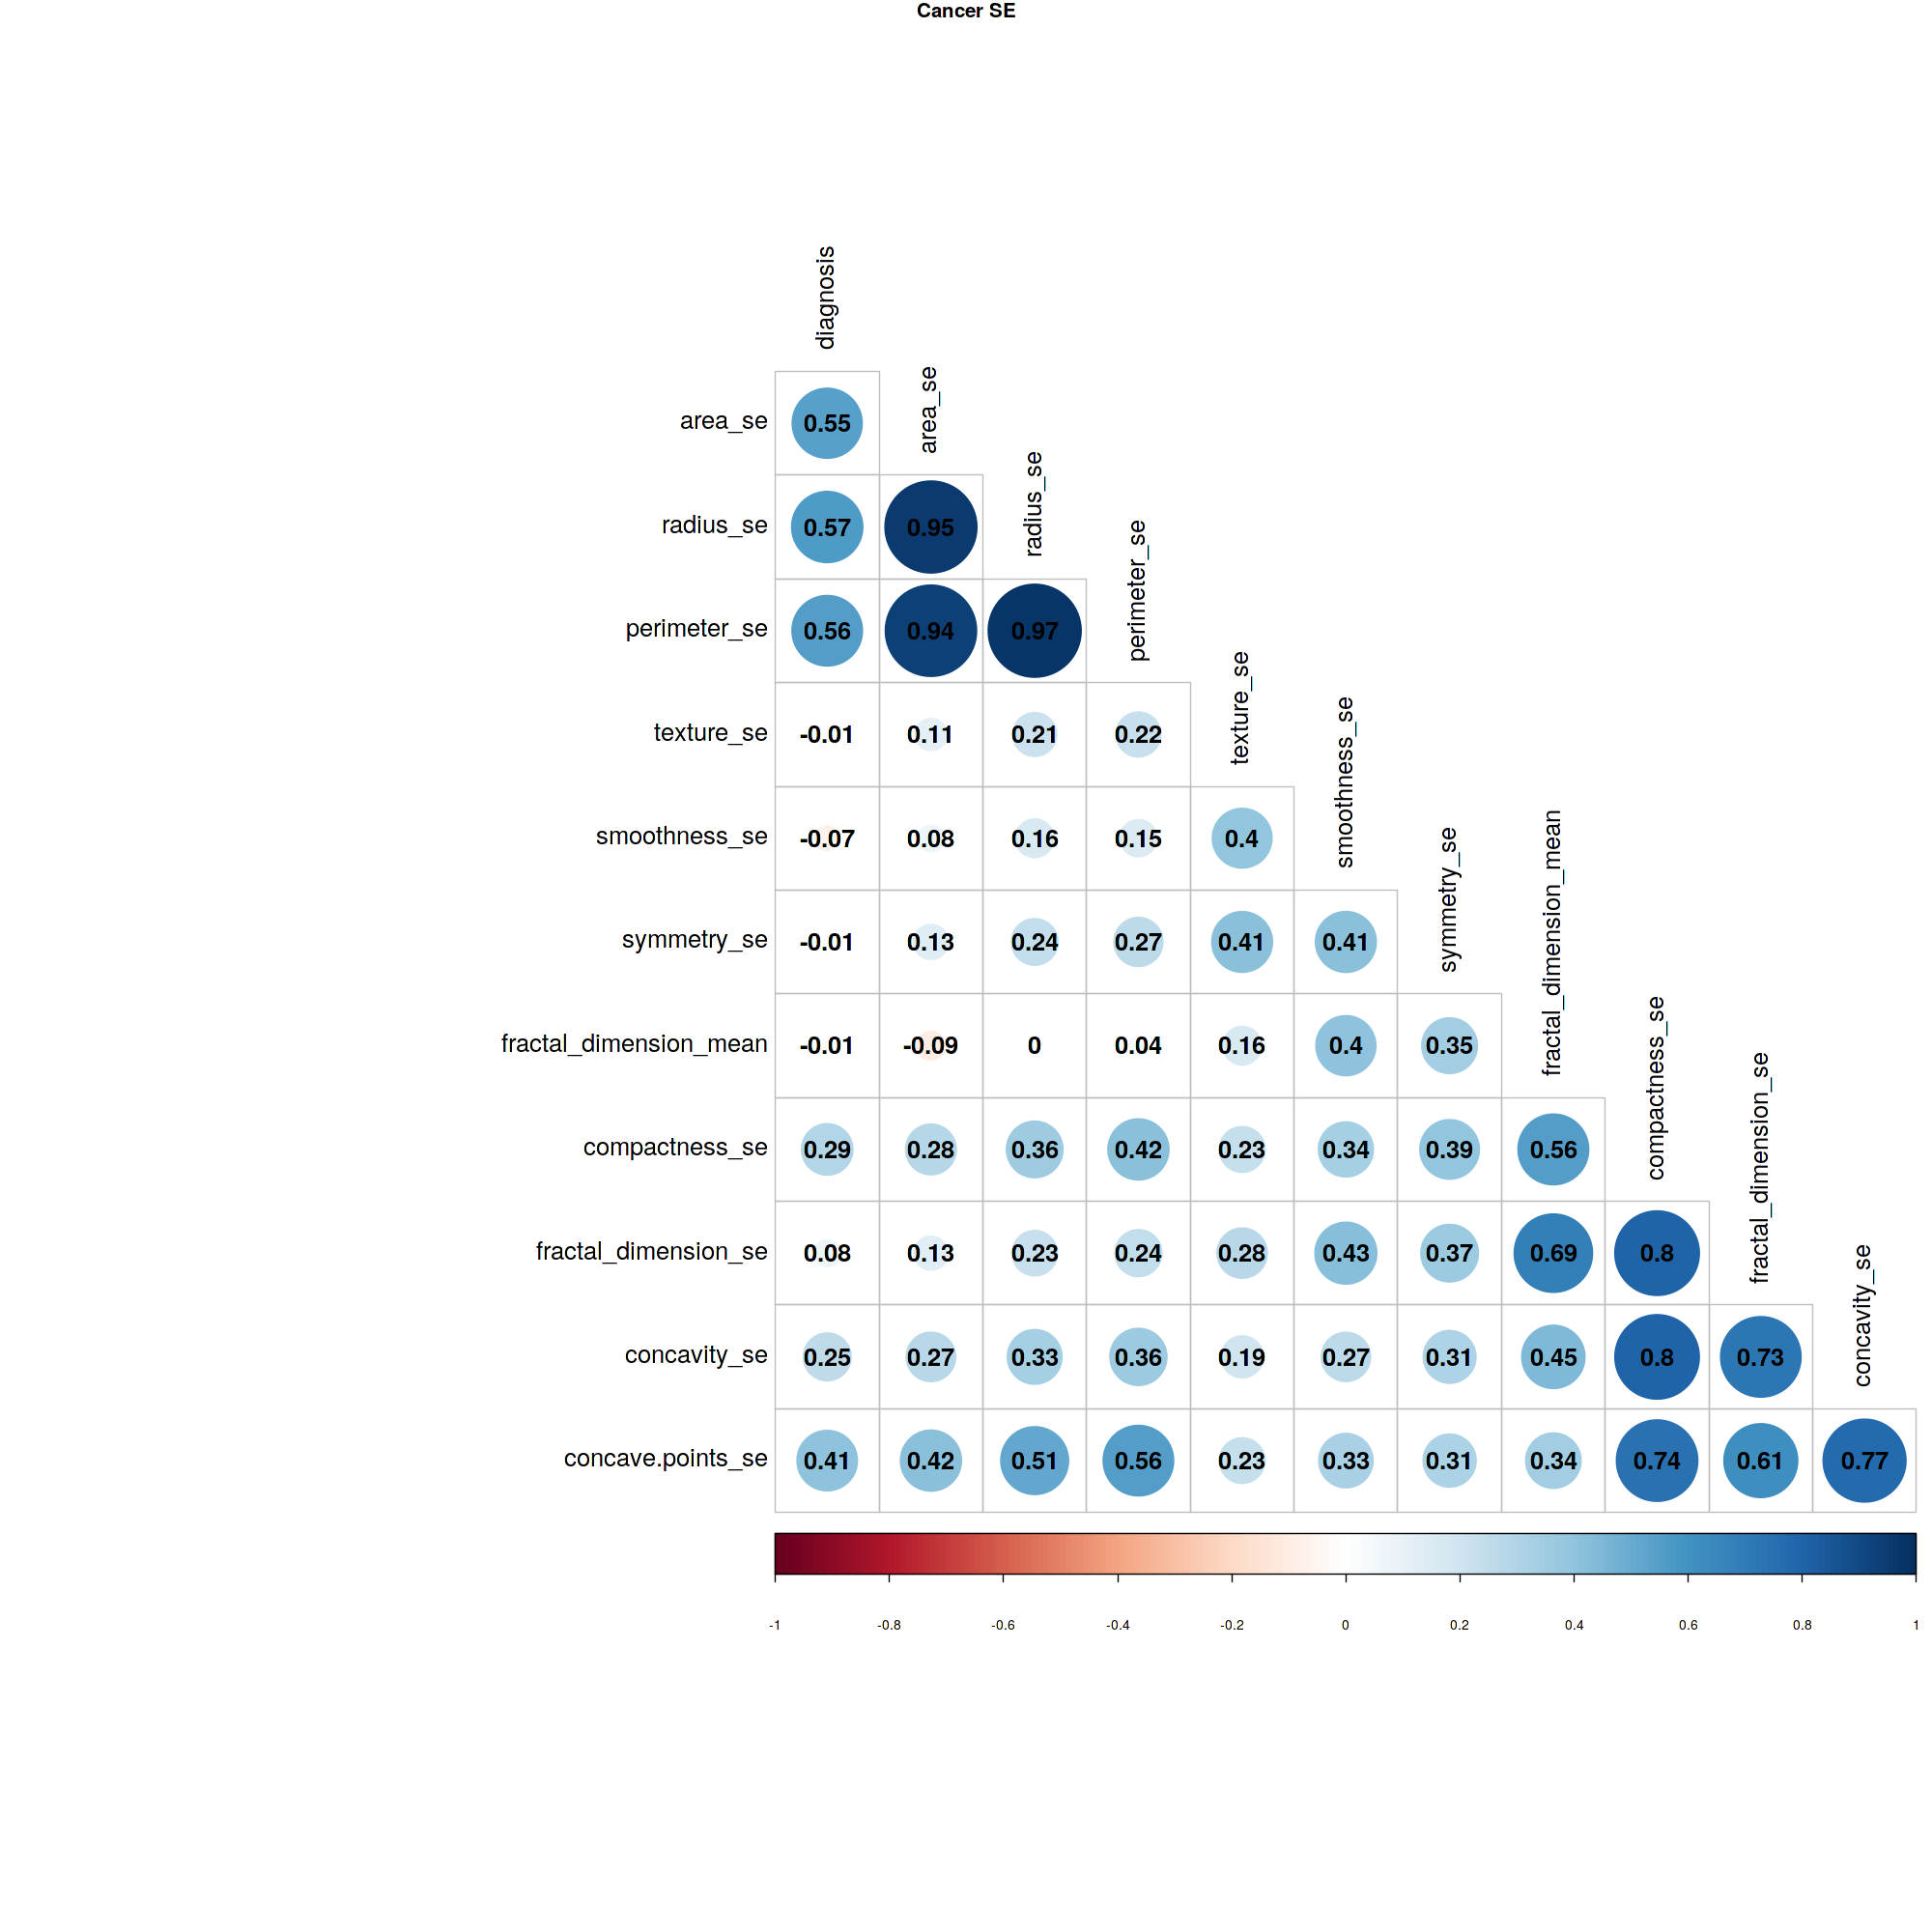

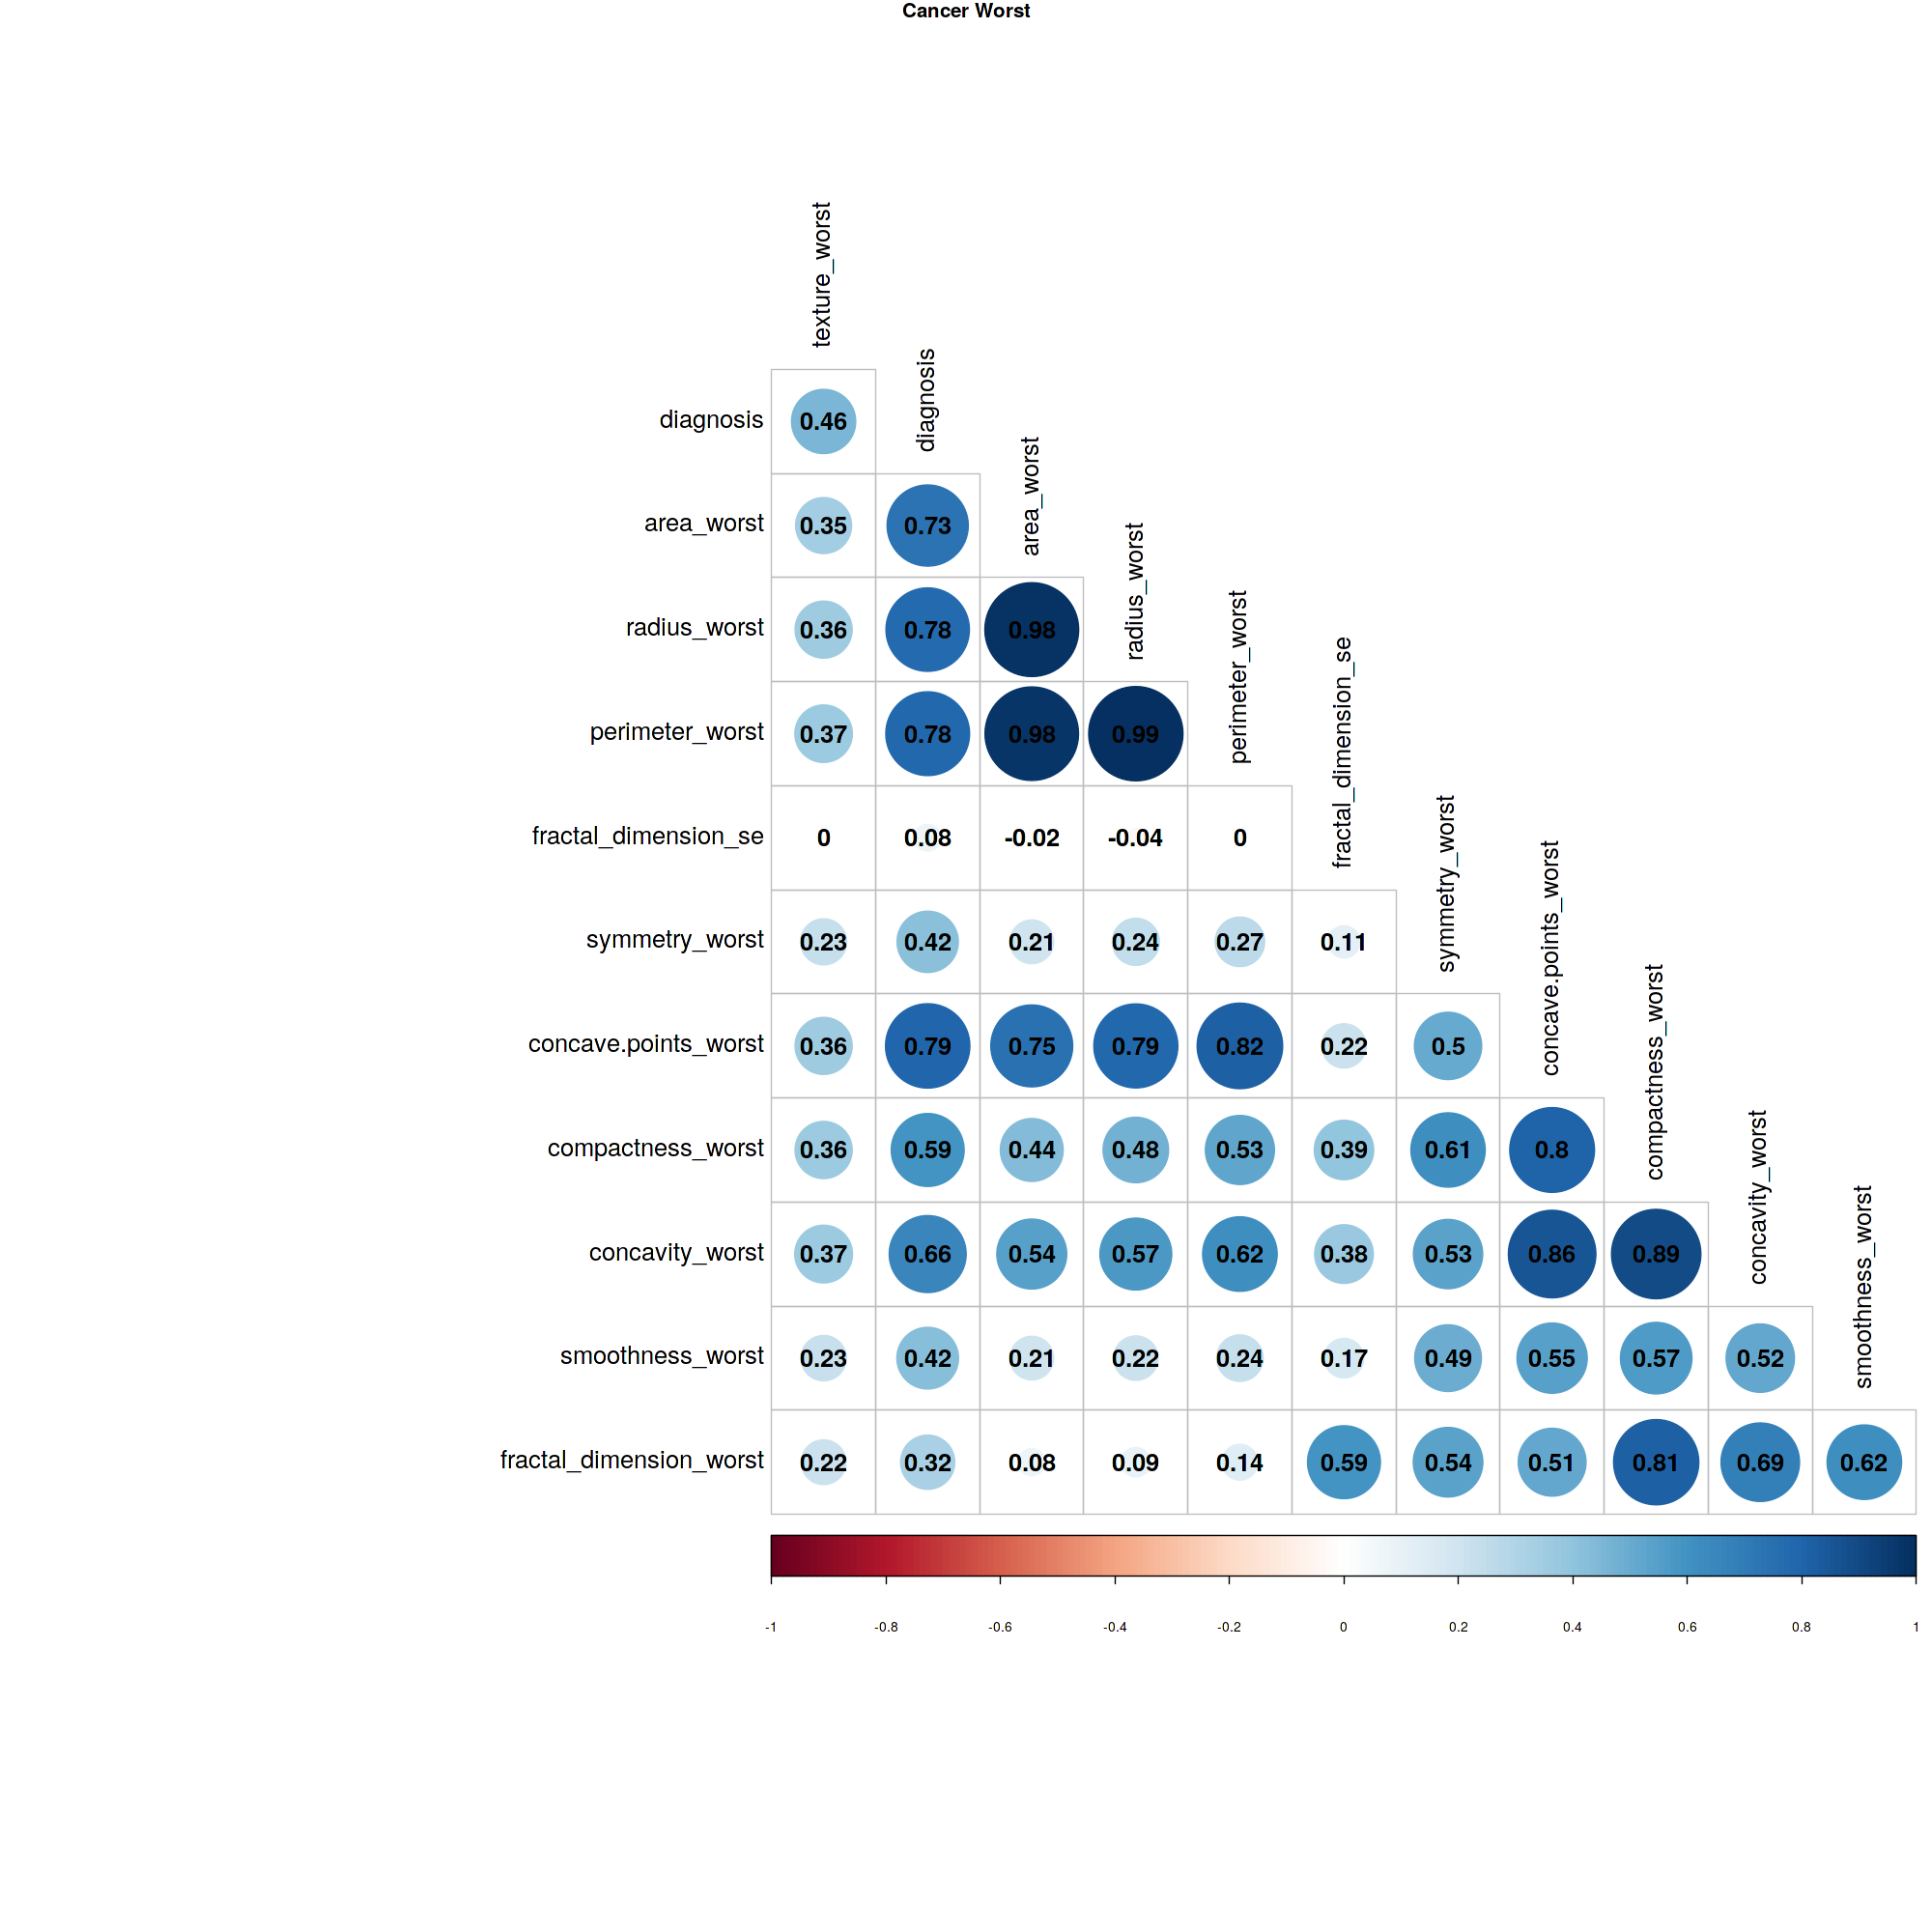

In [13]:
library(corrplot)
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

corrplot(cor(wbcd_df[,c(2:12)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer Mean",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

corrplot(cor(wbcd_df[,c(12:22, 2)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer SE",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

corrplot(cor(wbcd_df[,c(22:32, 2)]), 
         type="lower", 
         order="hclust", 
         tl.col="black", 
         addCoef.col="black",
         number.cex=1.5,
         tl.cex=1.5,
         title="Cancer Worst",
         # hide correlation on principal diagnol
         diag=FALSE,
         mar=c(0,0,1,0))

In [14]:
## Another library that could be usd: ggcorr

# ggcorr(wbcd[,c(2:11)], name = "corr", label = TRUE)+
#   theme(legend.position="none")+
# labs(title="Cancer Mean")+
# theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

### Summary: The following variables have high correlation with Diagnosis (corr coef >0.6):
1. concavity_mean/concave.points_mean
2. area_mean/radius_mean/perimeter_mean
3. area_worst/radius_worst/perimeter_worst
4. concavity_worst/concave.points_worst

**Thus 2 main factors affect the diagnosis: concavity and radius**

## Feature selection using PCA

In [15]:
library(factoextra)

wbcd_pca_df <- transform(wbcd_df)
head(wbcd_pca_df)
dim(wbcd_pca_df)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



id       diagnosis radius_mean texture_mean perimeter_mean area_mean
1   842302 1         17.99       10.38        122.80         1001.0   
2   842517 1         20.57       17.77        132.90         1326.0   
3 84300903 1         19.69       21.25        130.00         1203.0   
4 84348301 1         11.42       20.38         77.58          386.1   
5 84358402 1         20.29       14.34        135.10         1297.0   
6   843786 1         12.45       15.70         82.57          477.1   
  smoothness_mean compactness_mean concavity_mean concave.points_mean ⋯
1 0.11840         0.27760          0.3001         0.14710             ⋯
2 0.08474         0.07864          0.0869         0.07017             ⋯
3 0.10960         0.15990          0.1974         0.12790             ⋯
4 0.14250         0.28390          0.2414         0.10520             ⋯
5 0.10030         0.13280          0.1980         0.10430             ⋯
6 0.12780         0.17000          0.1578         0.08089             ⋯
  texture_worst perimeter_worst area_worst smoothness_worst compactness_worst
1 17.33         184.60          2019.0     0.1622           0.6656           
2 23.41         158.80          1956.0     0.1238           0.1866           
3 25.53         152.50          1709.0     0.1444           0.4245           
4 26.50          98.87           567.7     0.2098           0.8663           
5 16.67         152.20          1575.0     0.1374           0.2050           
6 23.75         103.40           741.6     0.1791           0.5249           
  concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst
1 0.7119          0.2654               0.4601         0.11890                
2 0.2416          0.1860               0.2750         0.08902                
3 0.4504          0.2430               0.3613         0.08758                
4 0.6869          0.2575               0.6638         0.17300                
5 0.4000          0.1625               0.2364         0.07678                
6 0.5355          0.1741               0.3985         0.12440                
  Label_Diagnosis
1 1              
2 1              
3 1              
4 1              
5 1              
6 1

[1] 569  33

In [16]:
## scaling required for PCA
all_pca <- prcomp(wbcd_pca_df[,c(3:32)], cor=TRUE, scale=TRUE)
summary(all_pca)

Warning message:
“In prcomp.default(wbcd_pca_df[, c(3:32)], cor = TRUE, scale = TRUE) :
 extra argument ‘cor’ will be disregarded”


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

**The cumulative proportion of PC1 to PC6 is 88.7% which means that PC1~PC6 can explain 88.7% of the whole data**

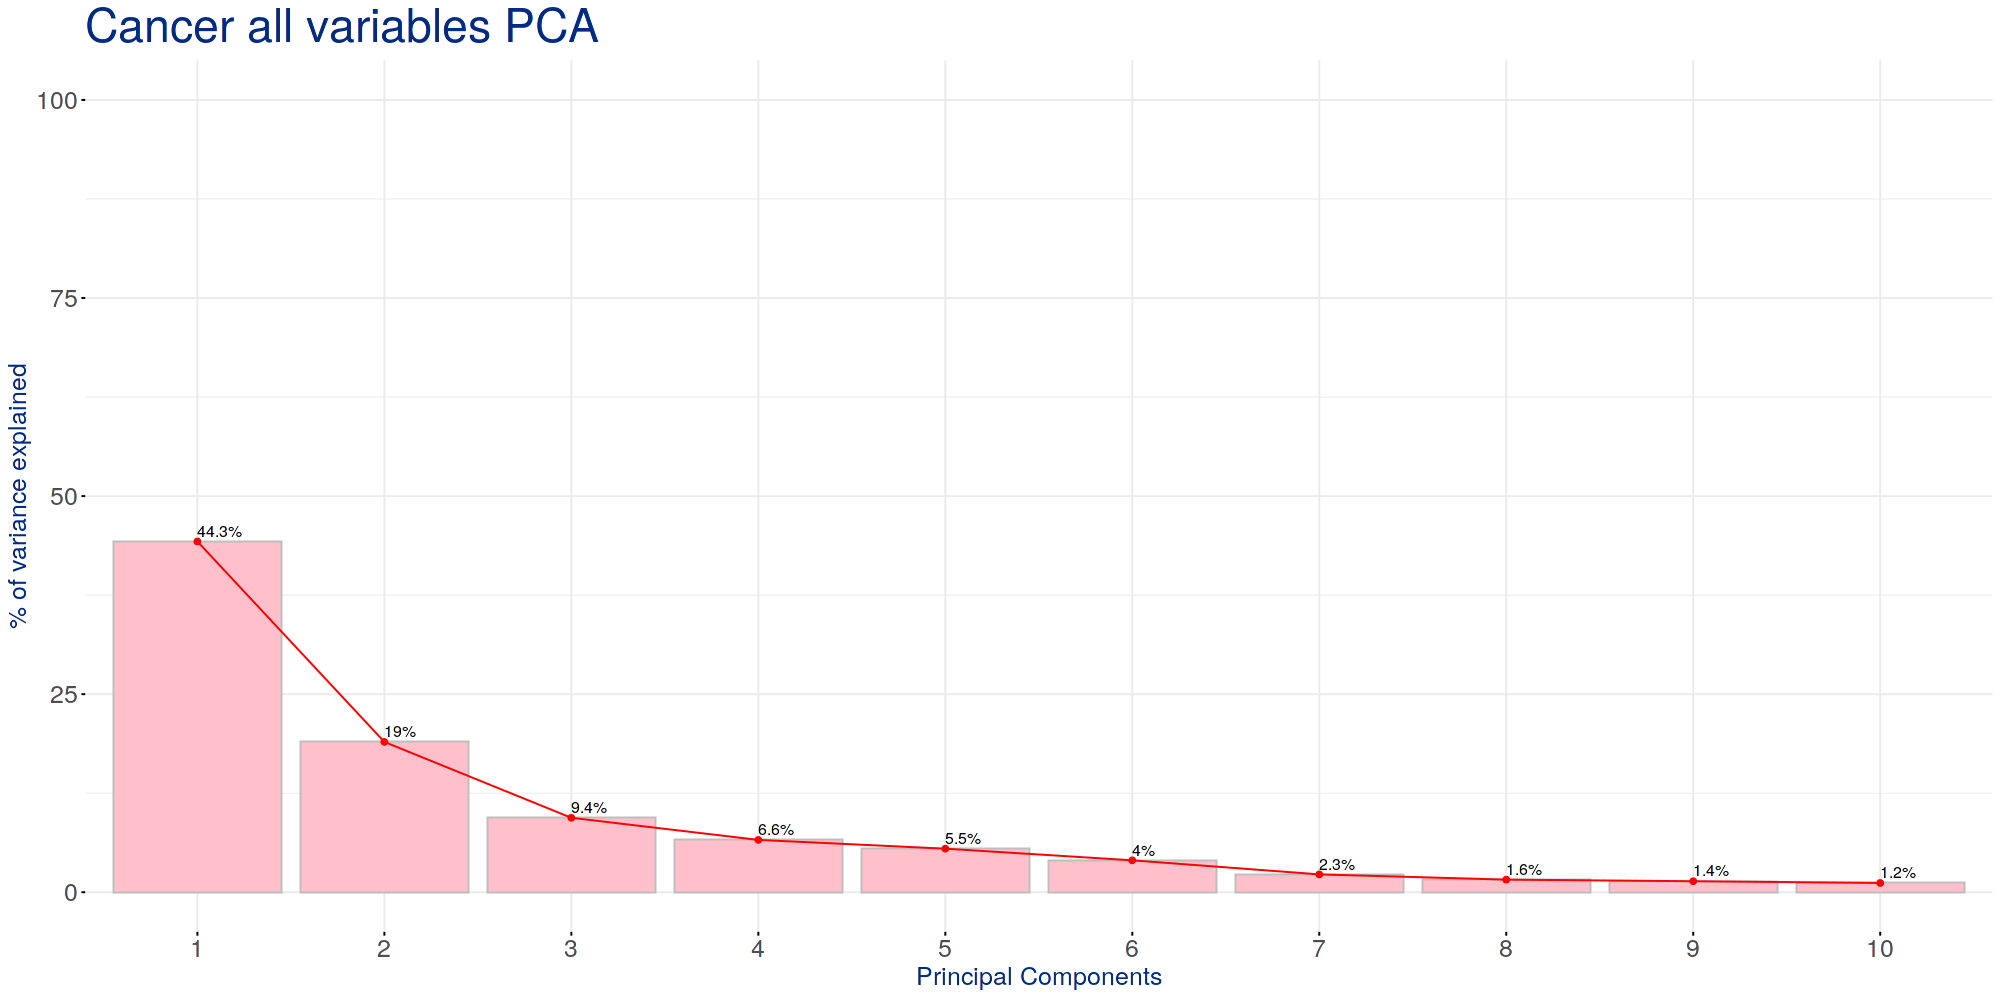

In [17]:
## Visualization of PCA components using screeplot
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

fviz_eig(all_pca, 
         addlabels=TRUE, 
         ylim=c(0,100), 
         geom= c("bar", "line"), 
         barfill="pink", 
         barcolor="grey", 
         linecolor="red", 
         ncp=10, labelsize = 13, repel = TRUE) + 
theme(text = element_text(size = 27.5, color="#002b80"),
        axis.title = element_text(size = 17.5),
        axis.text = element_text(size = 17.5)) +
labs(title="Cancer all variables PCA",
    x="Principal Components",
    y="% of variance explained")

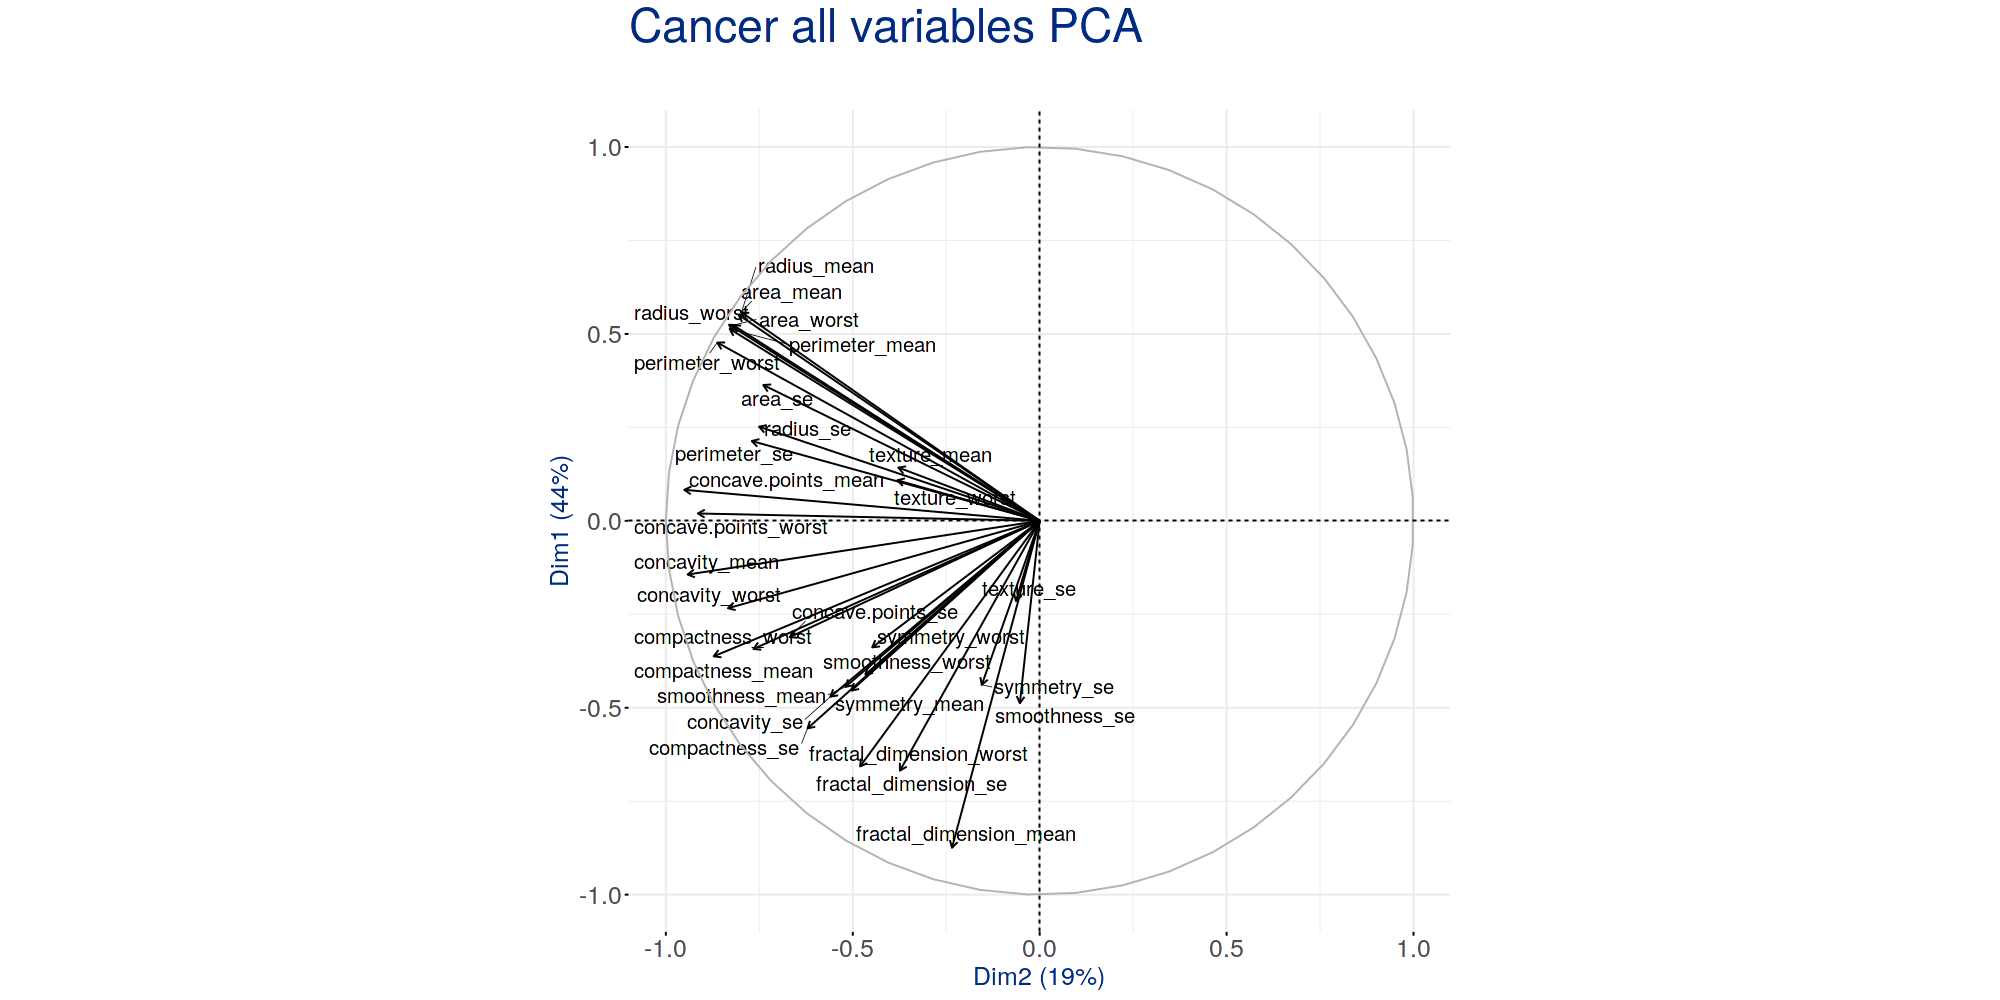

In [18]:
fviz_pca_var(all_pca, labelsize = 5, repel = TRUE) +
  theme(text = element_text(size = 27.5, color="#002b80"),
        axis.title = element_text(size = 17.5),
        axis.text = element_text(size = 17.5)) +
labs(title="Cancer all variables PCA\n",
    x="Dim2 (19%)",
    y="Dim1 (44%)")

In [19]:
all_var_explained <- get_pca_var(all_pca)
all_var_explained

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

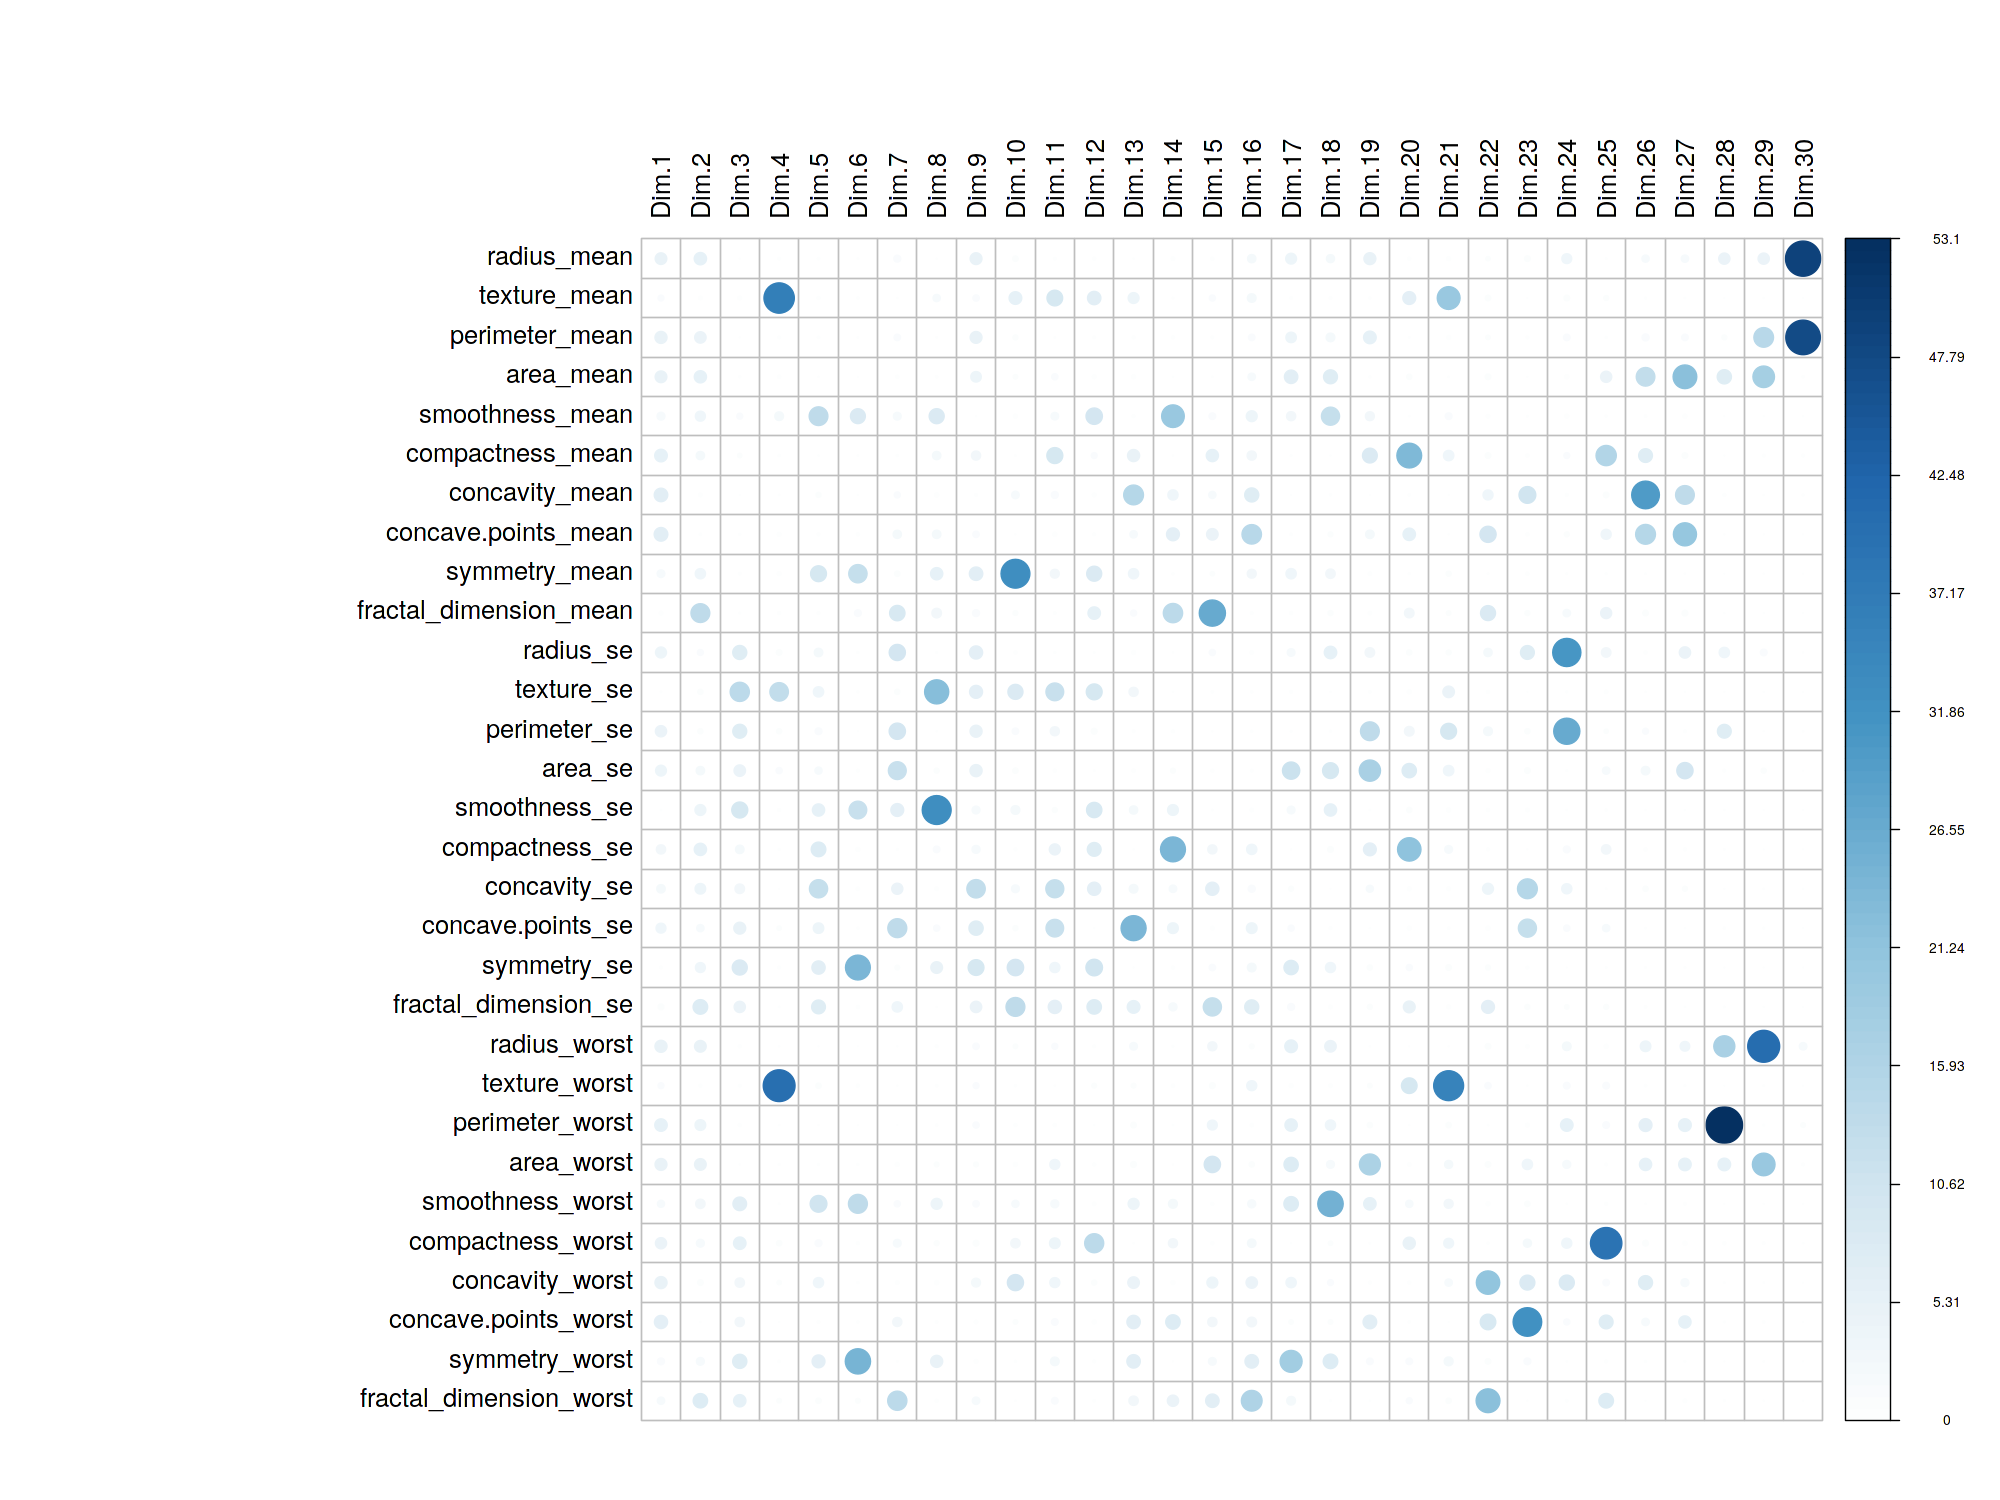

In [20]:
library(corrplot)

options(repr.plot.width = 20, repr.plot.height = 15)
corrplot(all_var_explained$contrib, 
        is.corr=FALSE,
        tl.col="black", 
        tl.cex=1.5)

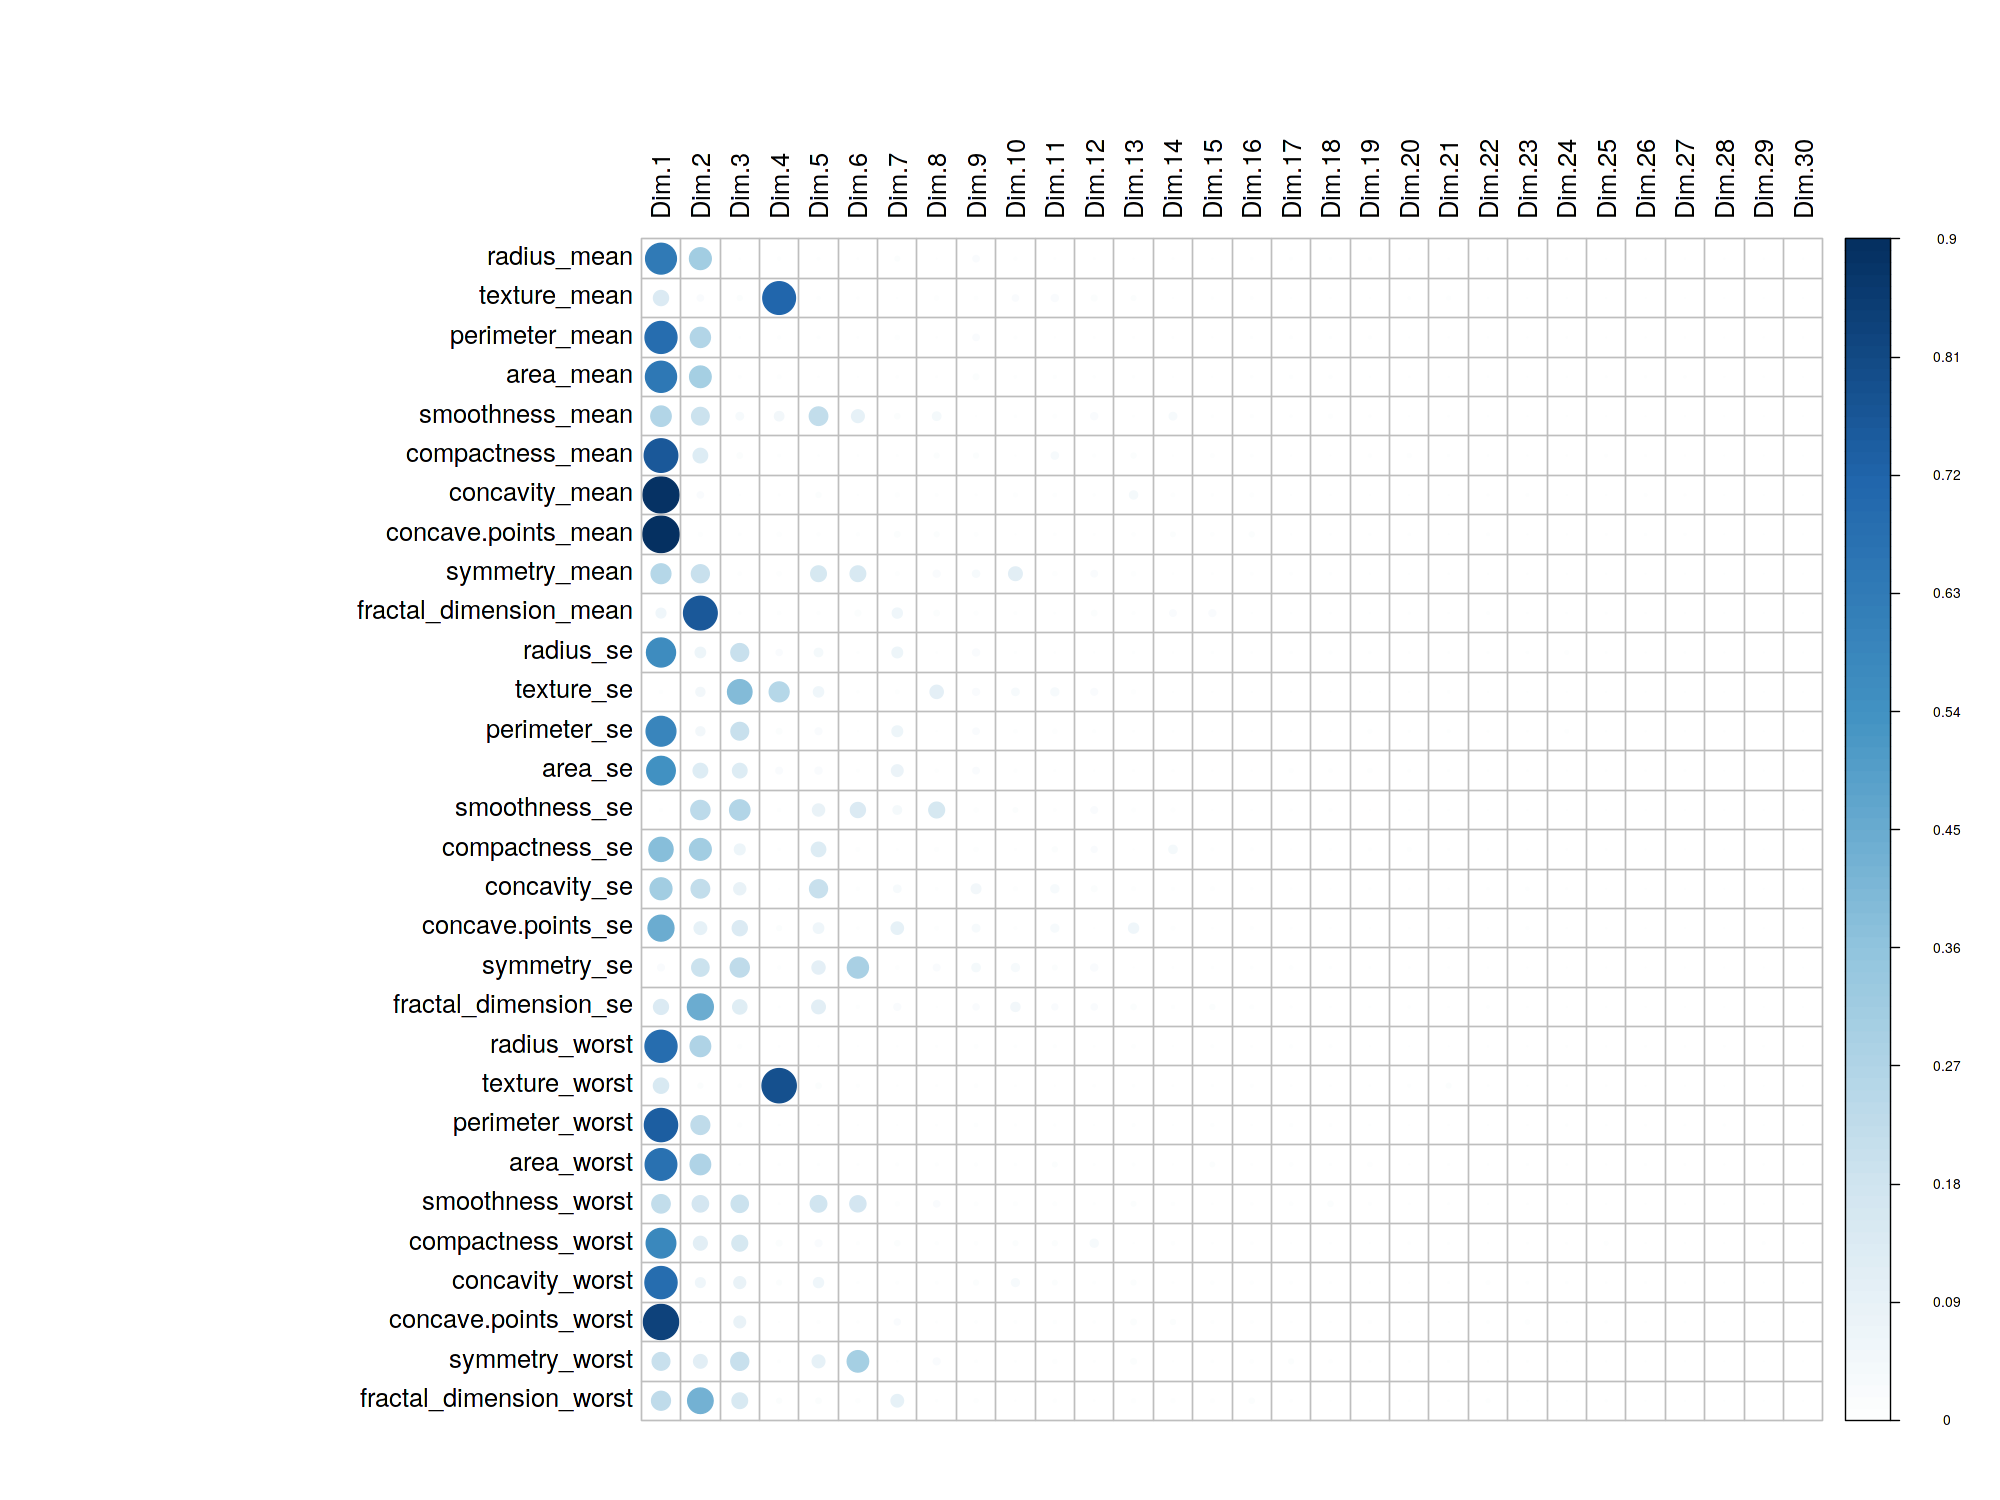

In [21]:
## quality of representation of variables
# since PC1 to PC6 have the highest explained variance -- cos 2 elaborates that and the correlation between variables and Principal Components

corrplot(all_var_explained$cos2, 
         is.corr=FALSE,
         tl.col="black", 
         tl.cex=1.5
         )

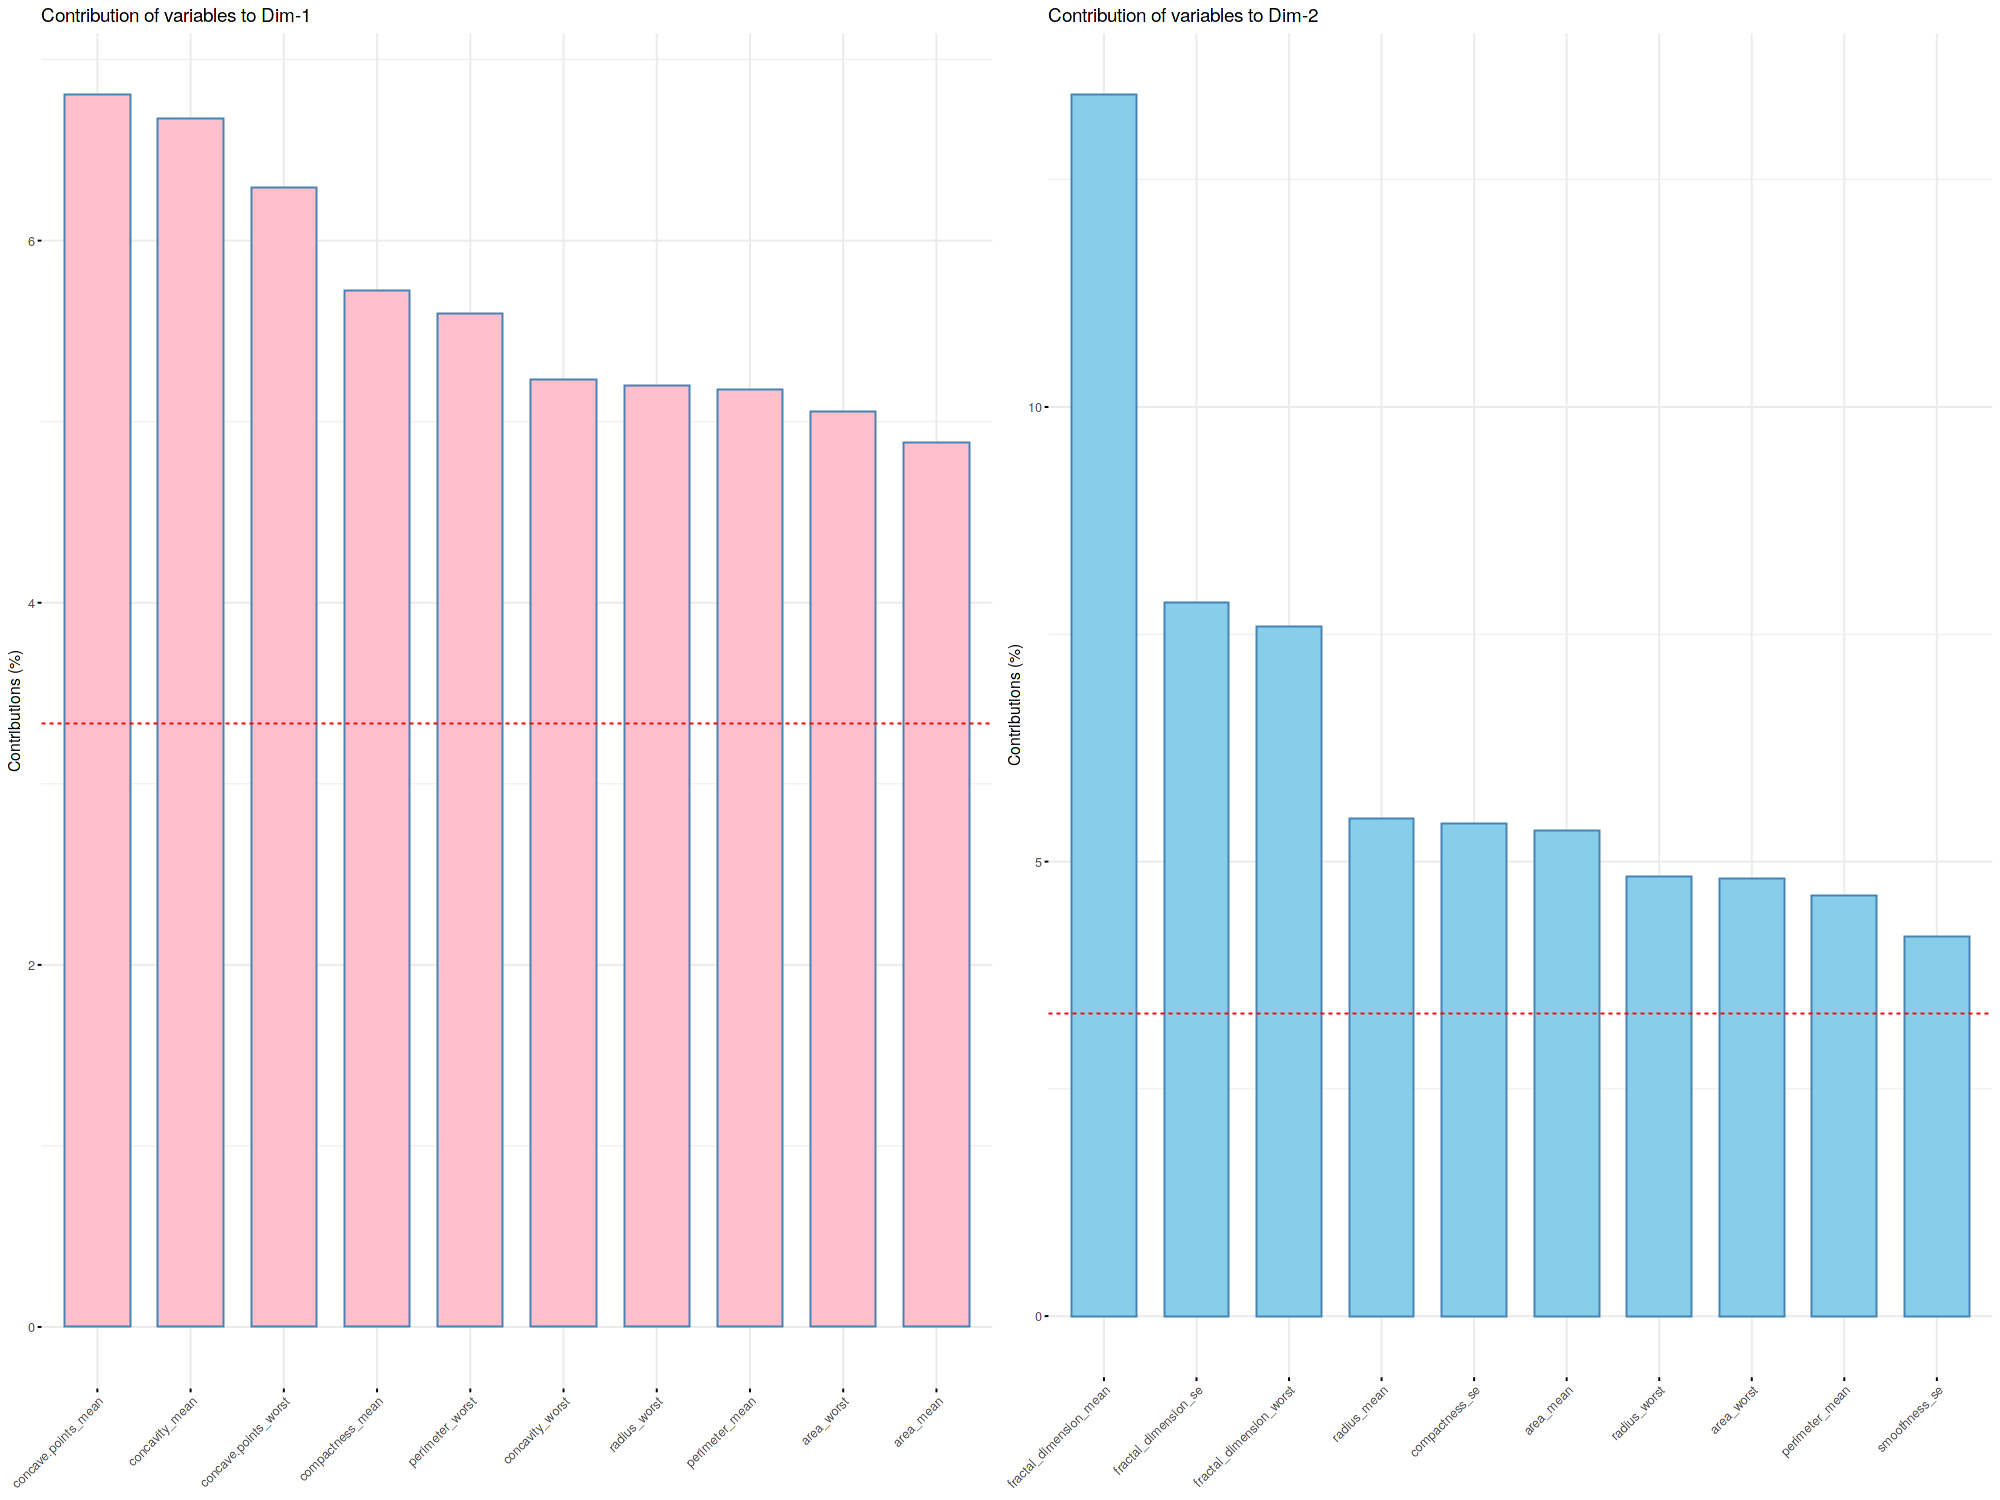

In [22]:
## Contributions of variables to PC1 and PC2

library(gridExtra)

p1 <- fviz_contrib(all_pca, choice="var", axes=1, fill="pink", top=10)
p2 <- fviz_contrib(all_pca, choice="var", axes=2, fill="skyblue", top=10)

grid.arrange(p1, p2, ncol=2)

**Clustering variables into Principal components**

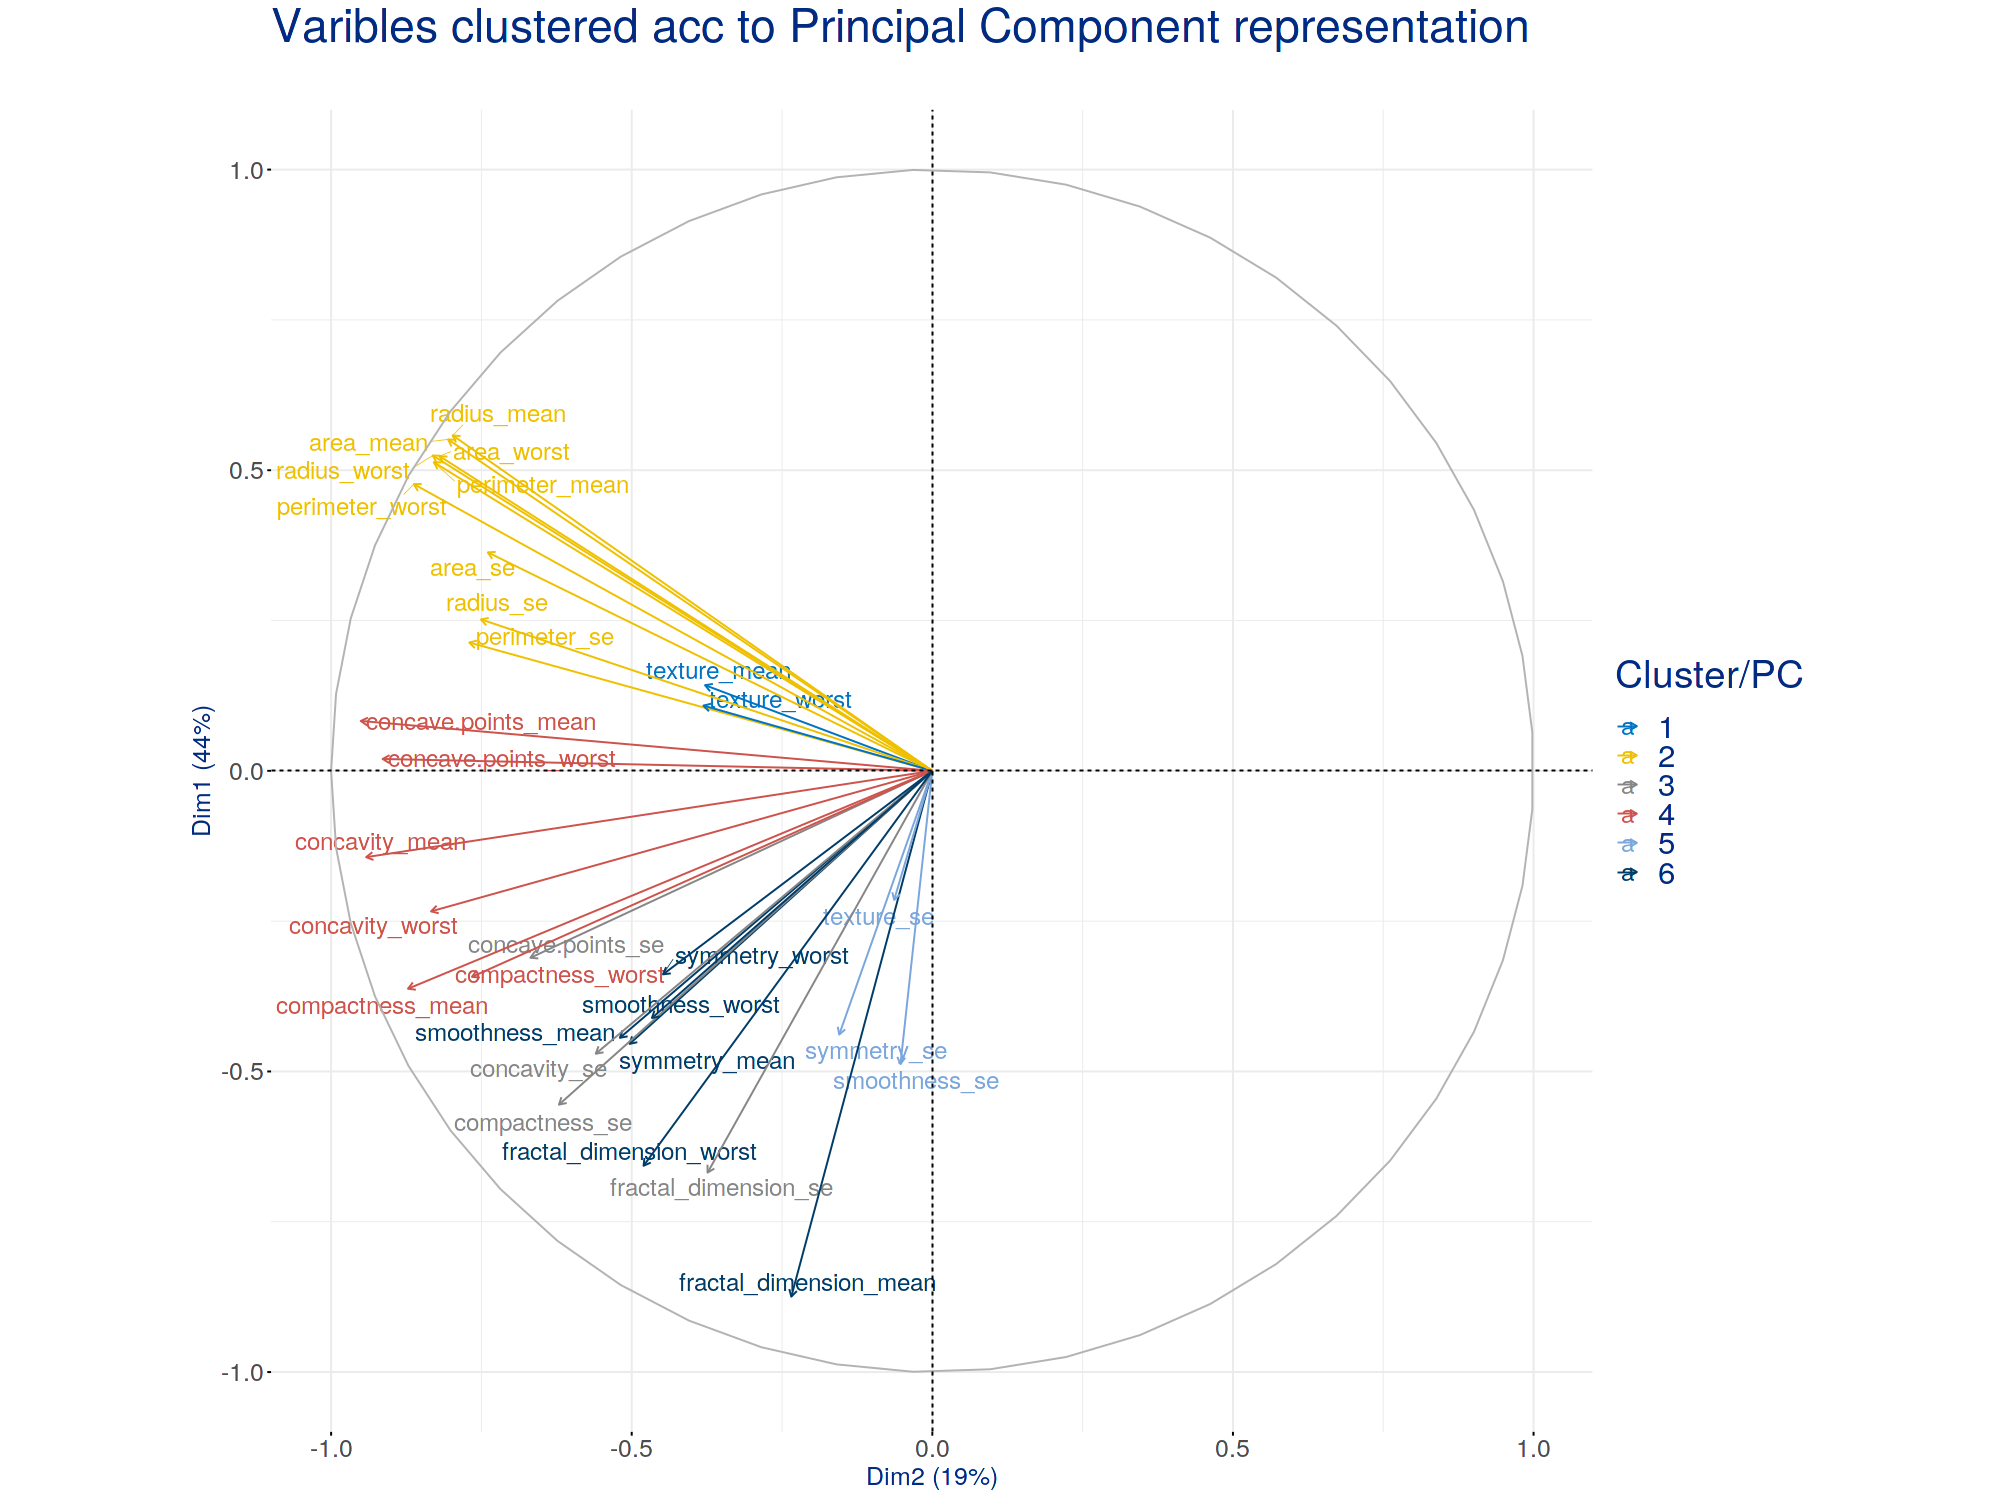

In [23]:
set.seed(21)

res.clusters <- kmeans(all_var_explained$coord, centers=6, nstart=25) # nstart generates multiple initial configurations and reports the best one
groups <- as.factor(res.clusters$cluster)

fviz_pca_var(all_pca, 
             col.var = groups,
             palette="jco",
             legend.title="Cluster/PC",
             labelsize=6, repel=TRUE) +
theme(text = element_text(size = 27.5, color="#002b80"),
        axis.title = element_text(size = 17.5),
        axis.text = element_text(size = 17.5)) +
labs(title="Varibles clustered acc to Principal Component representation\n",
    x="Dim2 (19%)",
    y="Dim1 (44%)")

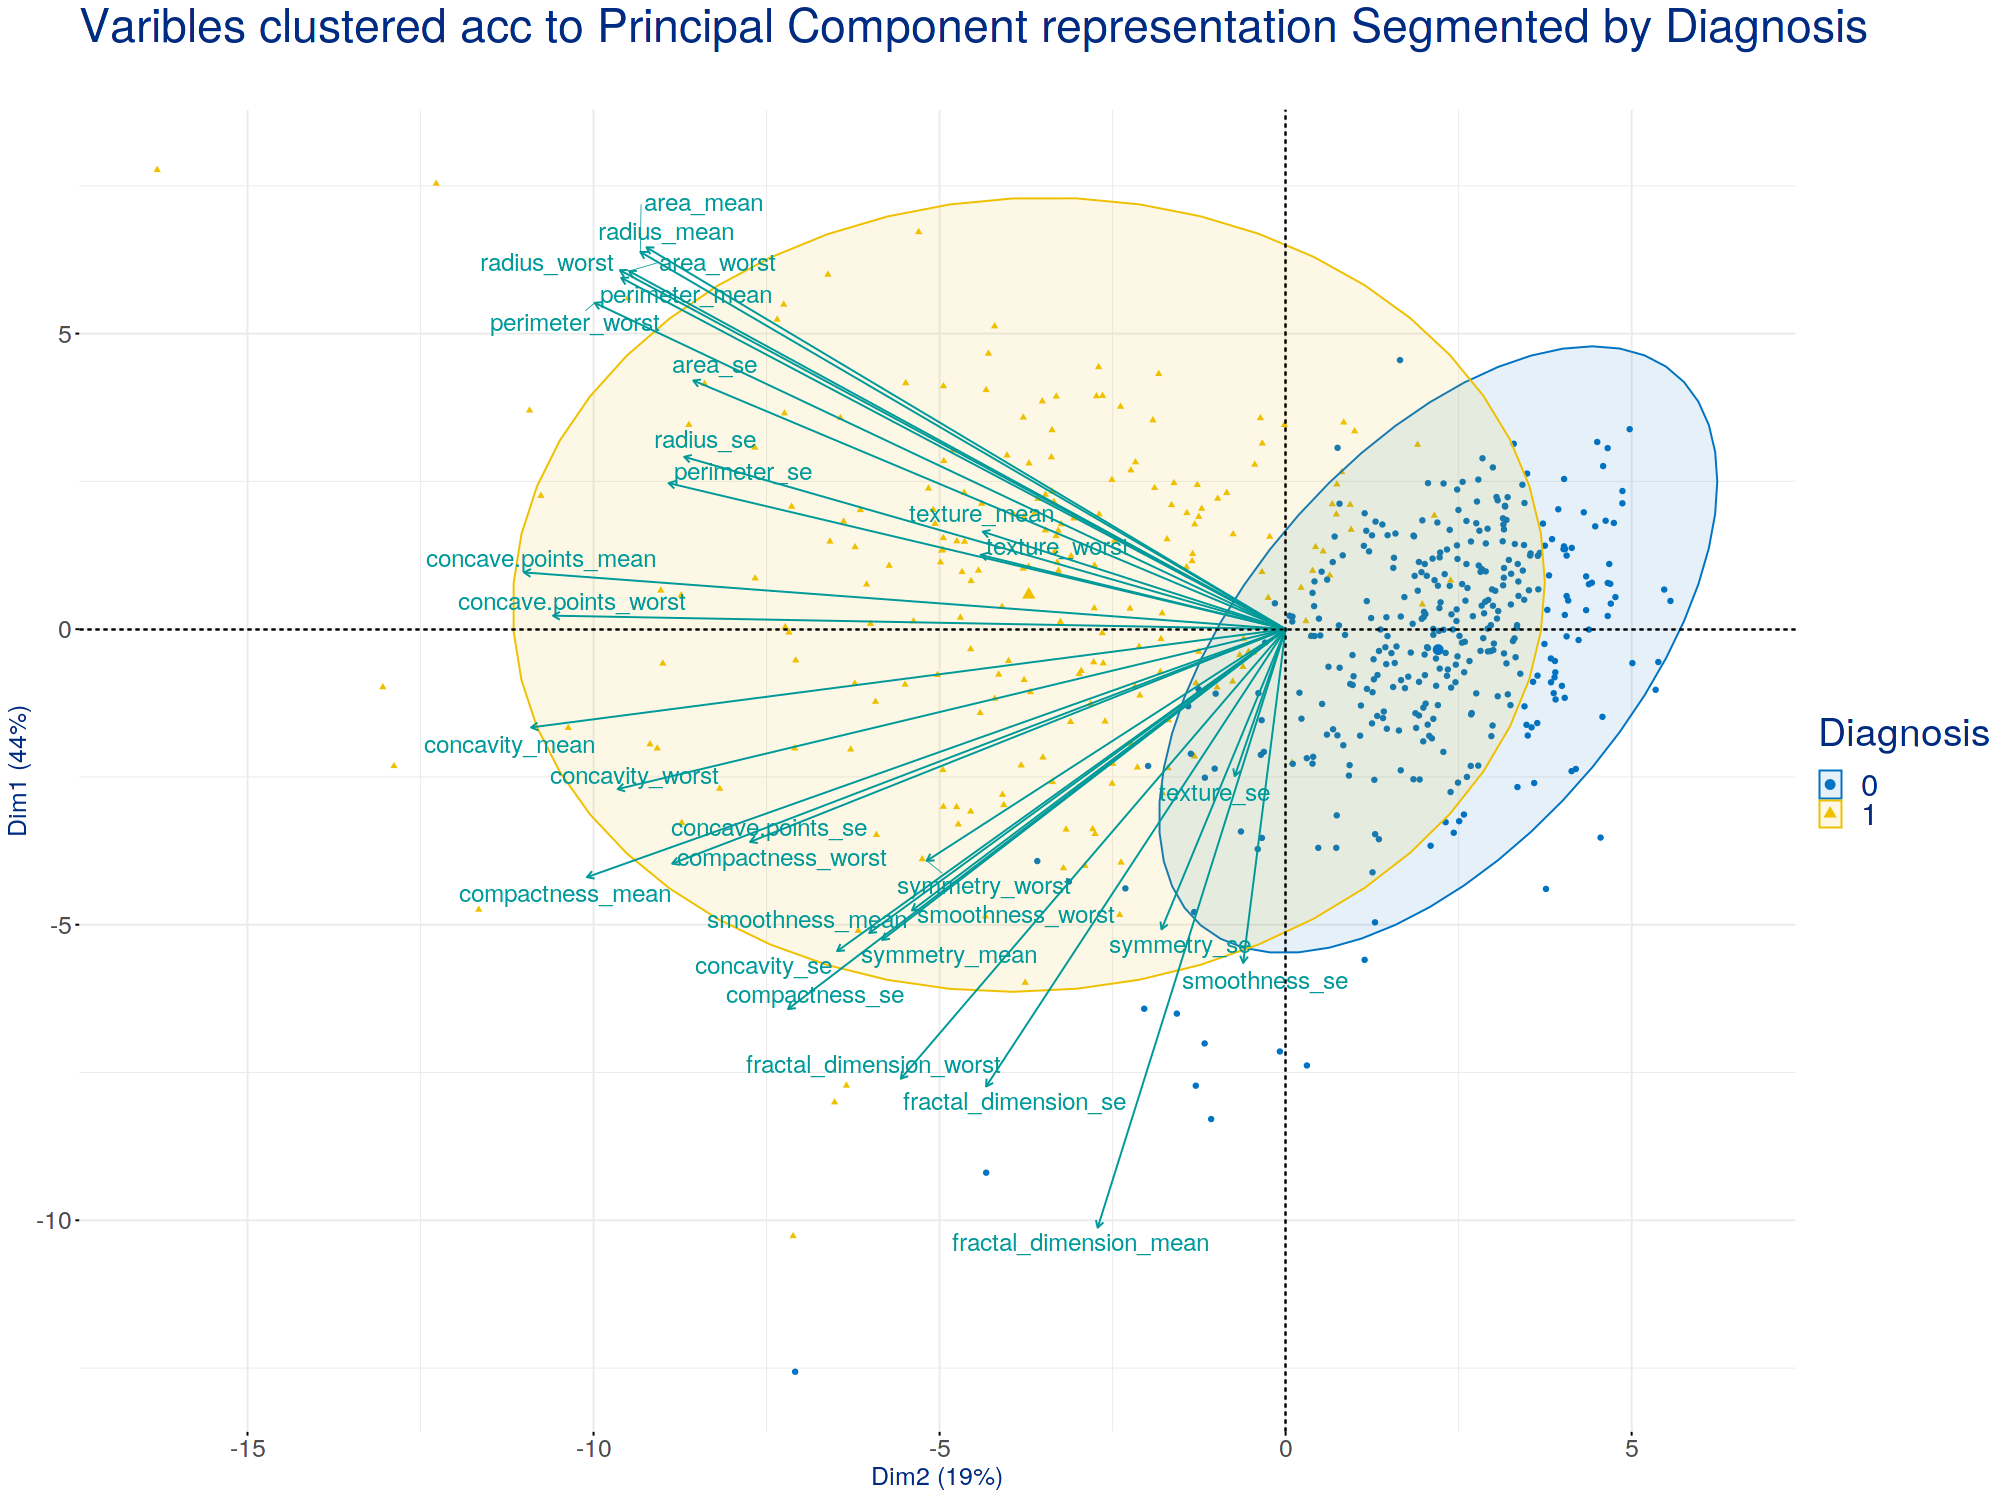

In [24]:
## Biplot according to diagnosis

fviz_pca_biplot(all_pca, 
                col.ind = wbcd_df$Label_Diagnosis,
                col="#009999",
                palette="jco",
                legend.title = "Diagnosis",
                addEllipses=TRUE,
                geom="point", 
                repel=TRUE, # repel overlapping text
                labelsize=6) +

theme(text = element_text(size = 27.5, color="#002b80"),
        axis.title = element_text(size = 17.5),
        axis.text = element_text(size = 17.5)) +

labs(title="Varibles clustered acc to Principal Component representation Segmented by Diagnosis\n",
    x="Dim2 (19%)",
    y="Dim1 (44%)")

## Conclusion:
The variables contributing mostly to PC1 and PC2 are: <br>
1. PC1: Concavity, radius
2. PC2: radius, compactness, smoothness, fractal dimensions

In [105]:
## Forming dataframe of the top 3 PCs and associated labels

pca_df = all_pca$x
pca_df = cbind(pca_df,wbcd_df)
pca_df = pca_df[,c(1:3, 31, 63)] # Keeping PC1, PC2, PC3, ID and Label_Diagnosis columns
head(pca_df)

PC1       PC2        PC3        id       Label_Diagnosis
1 -9.184755  -1.946870 -1.1221788   842302 1              
2 -2.385703   3.764859 -0.5288274   842517 1              
3 -5.728855   1.074229 -0.5512625 84300903 1              
4 -7.116691 -10.266556 -3.2299475 84348301 1              
5 -3.931842   1.946359  1.3885450 84358402 1              
6 -2.378155  -3.946456 -2.9322967   843786 1

In [44]:
table(pca_df$Label_Diagnosis)


  0   1 
357 212 

## Prediction using standard ML models using PCA features

In [108]:
# Splitting into training and test set using Caret package

library(caret)

set.seed(21)
train_index <- createDataPartition(pca_df$Label_Diagnosis, 
                                          p=0.8,
                                          list=FALSE
                                          #times=1 # times: number of partitions to create
                                          )

train_df <- pca_df[train_index, ]
test_df <- pca_df[-train_index, ]

In [109]:
dim(train_df)
dim(test_df)

[1] 456   5

[1] 113   5

In [110]:
## Almost similar proportion of benign to malignant in train and test set

prop.table(table(train_df$Label_Diagnosis))
prop.table(table(test_df$Label_Diagnosis))


       0        1 
0.627193 0.372807 


        0         1 
0.6283186 0.3716814 

**C5.0 classification model - Tree based**
<br>Documentation: https://cran.r-project.org/web/packages/C50/vignettes/C5.0.html (tree based, rule based, cost sensitive models)

In [92]:
library(C50)

c50_model <- C5.0(x= train_df[,1:3], 
                  y=train_df$Label_Diagnosis,
                  ## Controlling overfitting
                  conrol = C5.0Control(earlyStopping=TRUE, minCases=10, CF = 0.25),
                  trials=20
                 )
#summary(c50_model)
#plot(c50_model)

In [90]:
y_pred <- predict(c50_model, test_df[,1:3])
cm_c5.0 <- confusionMatrix(test_df$Label_Diagnosis, y_pred)
cm_c5.0

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 65  6
         1  7 35
                                          
               Accuracy : 0.885           
                 95% CI : (0.8113, 0.9373)
    No Information Rate : 0.6372          
    P-Value [Acc > NIR] : 2.478e-09       
                                          
                  Kappa : 0.7525          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9028          
            Specificity : 0.8537          
         Pos Pred Value : 0.9155          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6372          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.8782          
                                          
       'Positive' Class : 0               
                                    

In [91]:
acc_test <- numeric()
accuracy1 <- NULL; 
accuracy2 <- NULL

for(i in 1:50){
    C5.0_model_tuned <- C5.0(train_df[,1:3],train_df$Label_Diagnosis,trials = i)      
    y_pred <- predict(C5.0_model_tuned, test_df[,1:3]) 
    accuracy1 <- confusionMatrix(y_pred, test_df$Label_Diagnosis)
    accuracy2[i] <- accuracy1$overall[1]
}

acc <- data.frame(t= seq(1,50), cnt = accuracy2)

opt_t <- subset(acc, cnt==max(cnt))[1,]
sub <- paste("Optimal number of trials is", opt_t$t, "(accuracy :", opt_t$cnt,") in C5.0")

library(highcharter)
hchart(acc, 'line', hcaes(t, cnt)) %>%
  hc_title(text = "Accuracy With Varying Trials (C5.0)") %>%
  hc_subtitle(text = sub) %>%
  hc_add_theme(hc_theme_google()) %>%
  hc_xAxis(title = list(text = "Number of Trials")) %>%
  hc_yAxis(title = list(text = "Accuracy"))

HTML widgets cannot be represented in plain text (need html)

In [93]:
## After Tuning

c50_model <- C5.0(x= train_df[,1:3], 
                  y=train_df$Label_Diagnosis,
                  ## Controlling overfitting
                  conrol = C5.0Control(earlyStopping=TRUE, minCases=10, CF = 0.25),
                  trials=5
                 )

y_pred <- predict(c50_model, test_df[,1:3])
cm_c5.0 <- confusionMatrix(test_df$Label_Diagnosis, y_pred)
cm_c5.0

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 66  5
         1  5 37
                                          
               Accuracy : 0.9115          
                 95% CI : (0.8433, 0.9567)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 6.062e-12       
                                          
                  Kappa : 0.8105          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9296          
            Specificity : 0.8810          
         Pos Pred Value : 0.9296          
         Neg Pred Value : 0.8810          
             Prevalence : 0.6283          
         Detection Rate : 0.5841          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.9053          
                                          
       'Positive' Class : 0               
                                    

In [113]:
## Adding final predictions to wbcd_df
test_df$Predicted_Diagnosis <- as.vector(y_pred)
head(test_df, 10)

PC1        PC2         PC3        id       Label_Diagnosis
9  -3.1721332 -3.38883114 -3.1172431   844981 1              
10 -6.3461628 -7.72038095 -4.3380987 84501001 1              
16 -4.0720732 -2.97444398 -3.1225267 84799002 1              
21  1.5767738 -0.57230462 -1.7998630  8510653 0              
34 -4.9862154  1.13159322 -2.5751183   854002 1              
39  0.9971915  3.34834673  4.3017887   855133 1              
49  2.1345671 -0.09574536 -1.4910999   857155 0              
55  0.6740262  2.11454914 -1.3949923   857438 1              
56  2.8556458 -0.15258887  0.4285579 85759902 0              
60  4.1323269 -2.40167926 -1.2418657   858477 0              
   Predicted_Diagnosis
9  1                  
10 1                  
16 1                  
21 0                  
34 1                  
39 0                  
49 0                  
55 1                  
56 0                  
60 0

In [116]:
# Plotting confusion matrix

# par(mfrow=c(3,5))  # for making subplots
# #options(repr.plot.width = 1, repr.plot.height = 0.75)
# fourfoldplot(cm_c5.0$table, color=c("#CC6666", "#99CC99"), conf.level = 0, margin = 1, main = "C5.0 Confusion Matrix")

**Random Forest Prediction**

In [120]:
library(randomForest)
train_df <- train_df
model_rf <- randomForest(train_df[,1:3], train_df$Label_Diagnosis, ntree=200, proximity=T, importance=T)
y_pred <- predict(model_rf, test_df[,1:3])
cm_rf <- confusionMatrix(test_df$Label_Diagnosis, y_pred)
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 64  7
         1  8 34
                                          
               Accuracy : 0.8673          
                 95% CI : (0.7905, 0.9238)
    No Information Rate : 0.6372          
    P-Value [Acc > NIR] : 3.986e-08       
                                          
                  Kappa : 0.7144          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8889          
            Specificity : 0.8293          
         Pos Pred Value : 0.9014          
         Neg Pred Value : 0.8095          
             Prevalence : 0.6372          
         Detection Rate : 0.5664          
   Detection Prevalence : 0.6283          
      Balanced Accuracy : 0.8591          
                                          
       'Positive' Class : 0               
                                    

In [122]:
#plot(model_rf, main="Random Forest (Error Rate vs Number of Trees)" )

In [ ]:
#varImpPlot(learn_rf) #variable importance plot RF